In [2]:
#.libPaths(c('/usr/share/R/library','/usr/lib64/R/library',''))
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(scater))
options(stringsAsFactors = FALSE)
setwd("~/projects/training")

#### load data & annotations

In [55]:
wholeanno <-read.table('wholeannotation.csv',sep=',',header=T)[seq(1,64),]
wholeanno$Class <- "Ctrl"
wholeanno[which(wholeanno$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"

In [56]:
wholeanno$Sample_ID

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507891_B"   "lulab_507909_B"  
[17] "lulab_508877_B"   "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"  
[21] "lulab_515058_B"   "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B"
[25] "lulab_SH327412_B" "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B" 
[29] "lulab_5474594_B"  "lulab_6474170_B"  "lulab_8397116_B"  "lulab_BD.LOW.mix"
[33] "lulab_LY"         "lulab_CXD"        "lulab_Normal_1"   "lulab_Normal_2"  
[37] "lulab_Normal_3"   "lulab_Normal_4"   "lulab_Normal_5"   "lulab_Normal_6"  
[41] "lulab_Normal_7"   "lulab_Normal_8"   "lulab_498187_A"   "lulab_498221_A"  
[45] "lulab_385247_A"   "lulab_498191_A"   "lulab_511122_A"   "lulab_510199_A"  
[49] "lulab_333874_A"   "lulab_482592_A"   "lulab_486978_A"   "lulab_508955_A"  
[53] "lulab_509155_A"   "lulab_509442_A"   "lulab_509970_A"   "lulab_510470_A"  
[57] "lulab_515058_A"   "lulab_515292_A"   "lulab_10515058_A" "lulab_12402567_A"
[61] "lulab_13515292_A" "lulab_HBV_1"      "lulab_HBV_2"      "lulab_HBV_3"

In [71]:
raw_mx <- read.table('/home/chenxupeng/projects/training/05.matrix/hcc_lulab.sequentialMap.featureCounts.merged.mx', sep = "\t")
colnames(raw_mx)<-wholeanno$Sample_ID
#anno <- read.table("hcc_lulab.sample.info.txt", sep = "\t", header=T)
#anno$Class <- "Ctrl"
#anno[which(anno$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"
#mx <- raw_mx[, (names(raw_mx) %in% anno$Sample_ID)]

In [73]:
fulltop20 <- c('Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199075.1',
       'miRNA_ENSG00000207789.1', 'miRNA_ENSG00000283450.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000283935.1', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1',
       'miRNA_ENSG00000283733.1', 'miRNA_ENSG00000199072.3',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000207547.1')

In [72]:
raw_mx

lulab_249136_B lulab_385247_B lulab_423976_B
miRNA_ENSG00000278267.1           6           25               3          
miRNA_ENSG00000284332.1           0            1               0          
miRNA_ENSG00000273874.1           2           21               5          
miRNA_ENSG00000278791.1          14           10              13          
miRNA_ENSG00000207730.3       13983          704            1988          
miRNA_ENSG00000207607.3       13509          617            1599          
miRNA_ENSG00000198976.1        6948          300             965          
miRNA_ENSG00000278073.1           3            6               7          
miRNA_ENSG00000283712.1           2            4               1          
miRNA_ENSG00000284372.1           7           13               6          
miRNA_ENSG00000283572.1           0            0               0          
miRNA_ENSG00000207776.1           8           60              23          
miRNA_ENSG00000264341.1           0            0               0          
miRNA_ENSG00000264101.1           0            0               0          
miRNA_ENSG00000265392.1           0            0               0          
miRNA_ENSG00000274258.1           0            1               0          
miRNA_ENSG00000284357.1         926          211             271          
miRNA_ENSG00000265521.1          11           15               1          
miRNA_ENSG00000264881.1          54           34              42          
miRNA_ENSG00000276869.1           2           22               1          
miRNA_ENSG00000283789.1           2            0               0          
miRNA_ENSG00000263676.1           6            1               7          
miRNA_ENSG00000276830.1          11           23               7          
miRNA_ENSG00000263811.1           4           27               2          
miRNA_ENSG00000266634.1           0            0               0          
miRNA_ENSG00000265606.1           2            1               1          
miRNA_ENSG00000221662.1         837          231             721          
miRNA_ENSG00000284005.1           0            0               0          
miRNA_ENSG00000221808.1          21           38              11          
miRNA_ENSG00000266564.1           0            0               2          
⋮                             ⋮              ⋮              ⋮             
mRNA_ENSG00000242389.8          0              0             1            
mRNA_ENSG00000169807.10         0              0             2            
mRNA_ENSG00000169800.13         0              0             1            
mRNA_ENSG00000226941.8          0              0             0            
mRNA_ENSG00000169789.10         0              0             1            
mRNA_ENSG00000183753.10         1              0             1            
mRNA_ENSG00000188120.14         0              0             0            
mRNA_ENSG00000205944.11         0              0             0            
mRNA_ENSG00000172352.5          0              0             0            
mRNA_ENSG00000183795.8          0              0             0            
mRNA_ENSG00000187191.14         0              0             0            
mRNA_ENSG00000205916.11         0              0             0            
mRNA_ENSG00000185894.8          0              0             1            
mRNA_ENSG00000172288.7          0              0             1            
mRNA_ENSG00000168939.11_PAR_Y   5              0             4            
mRNA_ENSG00000124333.15_PAR_Y   5              4             3            
mRNA_ENSG00000124334.17_PAR_Y   0              0             0            
mRNA_ENSG00000198888.2        270            135            38            
mRNA_ENSG00000198763.3        257             85            21            
mRNA_ENSG00000198804.2        710            236            90            
mRNA_ENSG00000198712.1        496            160            33            
mRNA_ENSG00000228253.1         44             18       

In [74]:
rownames(raw_mx) %in% fulltop20

In [59]:
colnames(raw_mx)

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507891_B"   "lulab_507909_B"  
[17] "lulab_508877_B"   "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"  
[21] "lulab_515058_B"   "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B"
[25] "lulab_SH327412_B" "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B" 
[29] "lulab_5474594_B"  "lulab_6474170_B"  "lulab_8397116_B"  "lulab_BD.LOW.mix"
[33] "lulab_LY"         "lulab_CXD"        "lulab_Normal_1"   "lulab_Normal_2"  
[37] "lulab_Normal_3"   "lulab_Normal_4"   "lulab_Normal_5"   "lulab_Normal_6"  
[41] "lulab_Normal_7"   "lulab_Normal_8"   "lulab_498187_A"   "lulab_498221_A"  
[45] "lulab_385247_A"   "lulab_498191_A"   "lulab_511122_A"   "lulab_510199_A"  
[49] "lulab_333874_A"   "lulab_482592_A"   "lulab_486978_A"   "lulab_508955_A"  
[53] "lulab_509155_A"   "lulab_509442_A"   "lulab_509970_A"   "lulab_510470_A"  
[57] "lulab_515058_A"   "lulab_515292_A"   "lulab_10515058_A" "lulab_12402567_A"
[61] "lulab_13515292_A" "lulab_HBV_1"      "lulab_HBV_2"      "lulab_HBV_3"     
[65] NA

In [60]:
wholeanno$Status <- "HD"
wholeanno[which(wholeanno$Stage.BCLC=="A"),"Status"] <- "A"
wholeanno[which(wholeanno$Stage.BCLC=="B"),"Status"] <- "B"
wholeanno[which(wholeanno$Stage.BCLC=="C"),"Status"] <- "C"
wholeanno[which(wholeanno$Disease_status=="HCC_after_surgery"),"Status"] <- "Postoperative"
wholeanno[which(wholeanno$Disease_status=="mixed by 5 HBV"),"Status"] <- "CHB"

In [61]:
length(wholeanno$Status)

[1] 64

#### drop some sample

#### 调整removeind  
<span class="burk">改，后续用use来选sample！</span>

In [62]:
seq(1,64)[wholeanno$sampleuse ==1]

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
[26] 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 53
[51] 54 55 56 57 58 59 60 61 62 63 64

In [63]:
wholeanno$Sample_ID[wholeanno$sampleuse ==1]

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507909_B"   "lulab_508877_B"  
[17] "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"   "lulab_515058_B"  
[21] "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B" "lulab_SH327412_B"
[25] "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B"  "lulab_5474594_B" 
[29] "lulab_6474170_B"  "lulab_8397116_B"  "lulab_LY"         "lulab_CXD"       
[33] "lulab_Normal_1"   "lulab_Normal_2"   "lulab_Normal_3"   "lulab_Normal_4"  
[37] "lulab_Normal_5"   "lulab_Normal_6"   "lulab_Normal_7"   "lulab_Normal_8"  
[41] "lulab_498187_A"   "lulab_498221_A"   "lulab_385247_A"   "lulab_498191_A"  
[45] "lulab_510199_A"   "lulab_333874_A"   "lulab_482592_A"   "lulab_486978_A"  
[49] "lulab_508955_A"   "lulab_509155_A"   "lulab_509442_A"   "lulab_509970_A"  
[53] "lulab_510470_A"   "lulab_515058_A"   "lulab_515292_A"   "lulab_10515058_A"
[57] "lulab_12402567_A" "lulab_13515292_A" "lulab_HBV_1"      "lulab_HBV_2"     
[61] "lulab_HBV_3"

In [64]:
mx <- raw_mx[,seq(1,64)[wholeanno$sampleuse ==1]]  #64个sample还剩下remainind个

<span class="mark">QC sample in another python jupyter, so freeze QC, drop some sample and start from imputation</span>

In [ ]:
mx <- read.table("GSE71008.NvsCRC.reads.txt", sep = "\t")
anno <- read.table("GSE71008.NvsCRC.anno.txt", sep = "\t", header=T)
# assign class
anno$Class <- "NC"
anno[which(anno$Stage=="1S"),]$Class <- "S1"
anno[which(anno$Stage=="2S"),]$Class <- "S2"
anno[which(anno$Stage=="3S"),]$Class <- "S3"
anno[which(anno$Stage=="4S"),]$Class <- "S4"

In [65]:
#print (dim(raw_mx))
print (dim(mx))
#print (dim(withoutaftermx))
# we use mx and withoutaftermx

[1] 854751     61


****************
#### construct singleCellExperiment object

#### 选择mx或withoutaftermx作为接下来的矩阵

In [66]:
reads <- SingleCellExperiment(
    assays = list(counts = as.matrix(mx)),
    colData = wholeanno[wholeanno$sampleuse ==1,])
reads

class: SingleCellExperiment 
dim: 854751 61 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(0):
colnames(61): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(30): X Unnamed..0 ... Class Status
reducedDimNames(0):
spikeNames(0):

##### Remove genes that are not expressed in any samples

In [67]:
keep_feature <- rowSums(counts(reads) > 0) > 0
reads <- reads[keep_feature, ]
dim(reads)

[1] 854751     61

In [69]:
reads <-  calculateQCMetrics(reads)

ERROR: Error in .get_qc_metrics_per_cell(exprs_mat, exprs_type = exprs_values, : unacceptable matrix type


In [17]:
sum(counts(reads)<0)

[1] 0

****************
### filter samples and genes

hist(reads$total_counts,breaks = 100)
abline(v=19000000, col="red")
filter_by_total_counts <- (reads$total_counts > 0)
table(filter_by_total_counts)

hist(reads$total_features,breaks = 100)
abline(v=15000, col="red")
filter_by_expr_features <- (reads$total_features > 0)
table(filter_by_expr_features)

In [ ]:
options(repr.plot.height=1)
options(repr.plot.width=1)

#### automitic filter

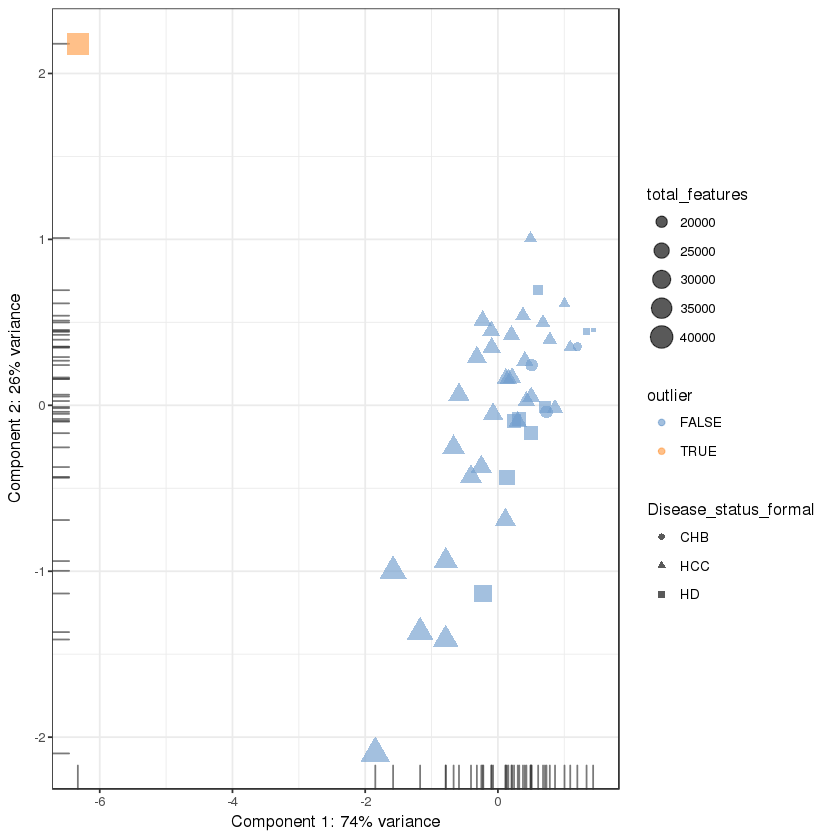

In [105]:
reads <- suppressMessages(plotPCA(
    reads,
    size_by = "total_features",
    shape_by = "Disease_status_formal",
    pca_data_input = "pdata",
    detect_outliers = TRUE,
    return_SCE = TRUE
))

filter_by_outlier <- !reads$outlier

In [106]:
filter_by_outlier

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

#### sample filtering

In [18]:
reads$use <-rep(TRUE,dim(reads)[2])

#### gene QC
##### filter genes with too low expression

plotHighestExprs(reads,n=20)

plotQC(reads, type = "highest-expression")

In [1]:
plotHighestExprs(reads,n=20)

ERROR: Error in plotHighestExprs(reads, n = 20): could not find function "plotHighestExprs"


`geom_smooth()` using method = 'gam'


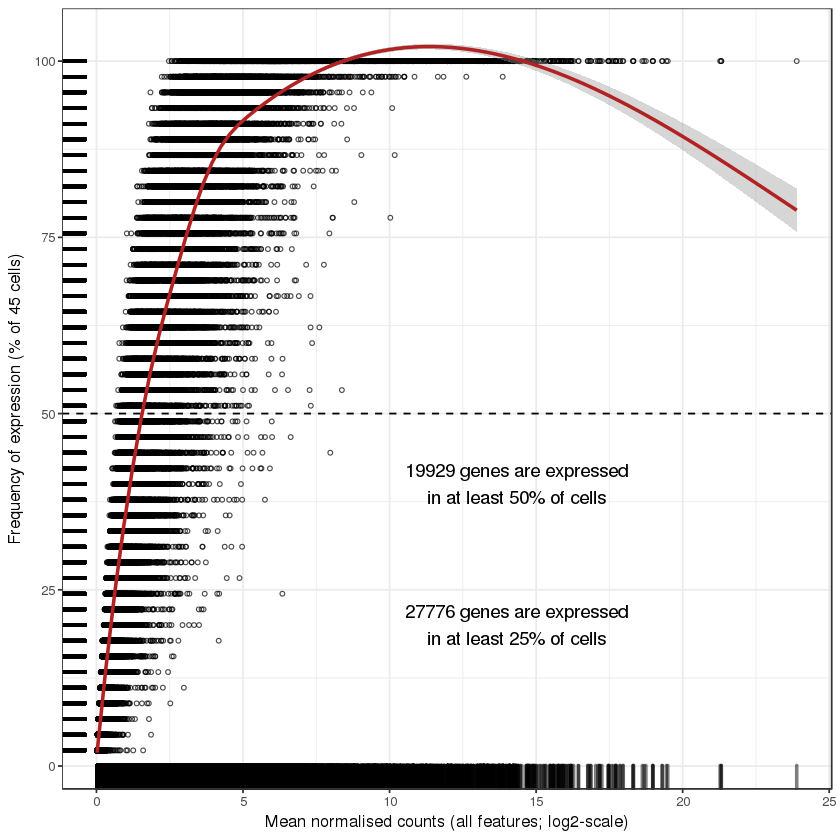

In [9]:
# top 20 
top20 <- c("Y_RNA_ENSG00000201778.1", "miRNA_ENSG00000284565.1", "miRNA_ENSG00000283364.1", "lncRNA_ENSG00000264066.6", "miRNA_ENSG00000284190.1", "miRNA_ENSG00000199179.3", "miRNA_ENSG00000199075.1", "miRNA_ENSG00000207789.1", "miRNA_ENSG00000284440.1", "miRNA_ENSG00000207778.3", "lncRNA_ENSG00000267391.4", "miRNA_ENSG00000199150.3", "miRNA_ENSG00000199161.1", "miRNA_ENSG00000199085.3", "miRNA_ENSG00000274705.2", "miRNA_ENSG00000283450.1", "miRNA_ENSG00000284520.1", "lncRNA_ENSG00000234741.7", "miRNA_ENSG00000199153.1", "miRNA_ENSG00000283733.1")

# number of cells with non-zero expression
plotQC(reads, type = "exprs-freq-vs-mean")

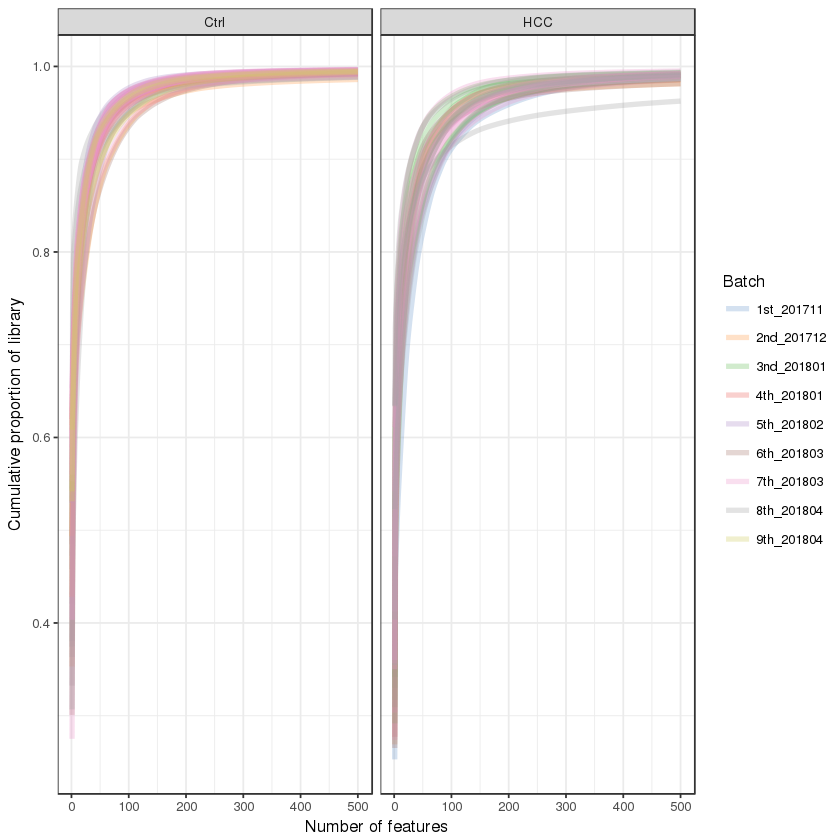

In [161]:
plotScater(reads, block1 = "Class",
     colour_by = "Batch", nfeatures = 500, exprs_values = "counts")

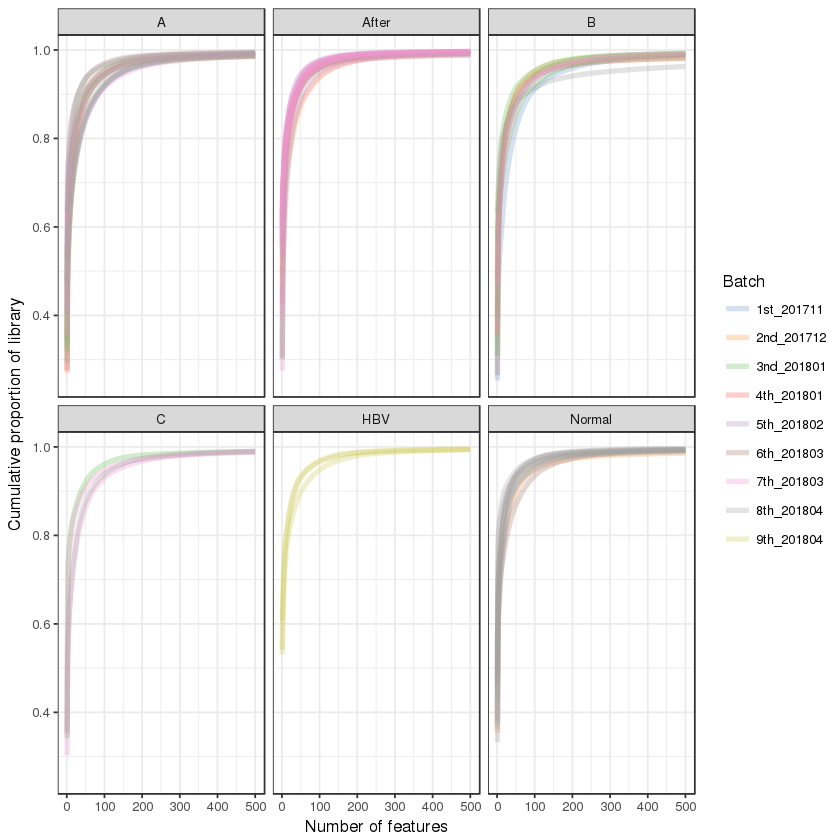

In [160]:
plotScater(reads, block1 = "Status",
     colour_by = "Batch", nfeatures = 500, exprs_values = "counts")

In [19]:
filter_genes <- apply(counts(reads[, colData(reads)$use]), 1, function(x) length(x[x >= 2]) >= 10)
table(filter_genes)
rowData(reads)$use <- filter_genes
reducedDim(reads) <- NULL
dim(reads[rowData(reads)$use, colData(reads)$use])

filter_genes
FALSE  TRUE 
80337 25257 

[1] 25257    61

In [20]:
assay(reads, "logcounts_raw") <- log2(counts(reads) + 1)
reads.qc <- reads[rowData(reads)$use, colData(reads)$use]
endog_genes <- !rowData(reads.qc)$is_feature_control

In [21]:
sum(counts(reads.qc)<0)

[1] 0

In [22]:
# save the data
saveRDS(reads.qc, file = "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim43sample.rds")
write.csv(counts(reads.qc), "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim43sample.rds.csv")

In [419]:
?plotPCA

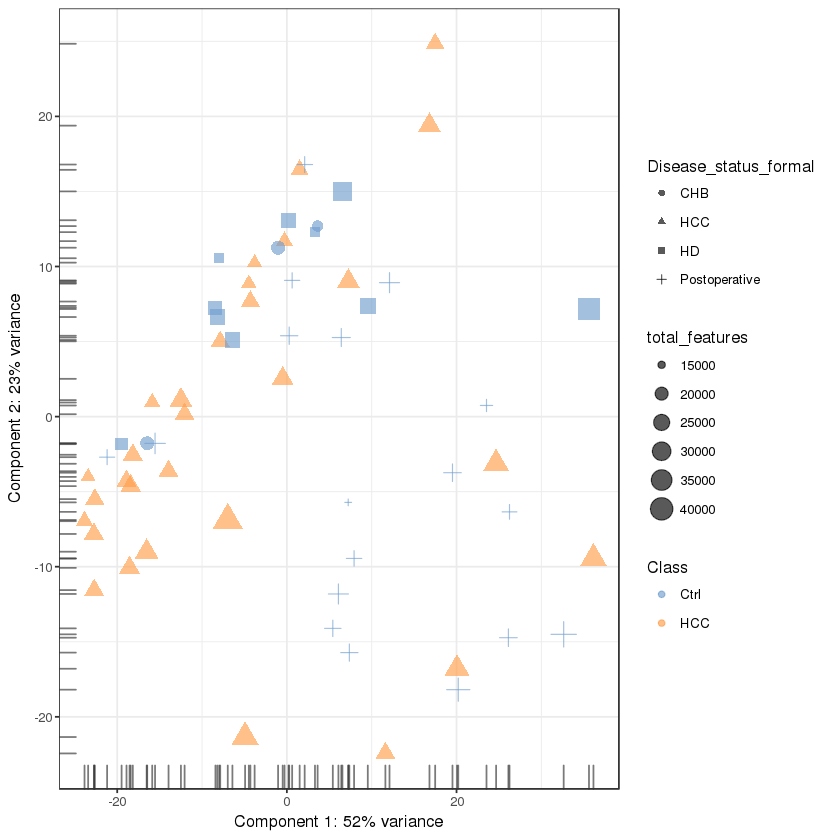

In [23]:
plotPCA(
    reads.qc[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features"
)

## imputation

In [26]:
dim(reads.qc)

[1] 25257    61

In [29]:
counts(reads.qc)

lulab_249136_B lulab_385247_B lulab_423976_B
miRNA_ENSG00000278267.1           6           25               3          
miRNA_ENSG00000273874.1           2           21               5          
miRNA_ENSG00000278791.1          14           10              13          
miRNA_ENSG00000207730.3       13980          704            1986          
miRNA_ENSG00000207607.3       13504          617            1598          
miRNA_ENSG00000198976.1        6945          300             962          
miRNA_ENSG00000278073.1           3            6               7          
miRNA_ENSG00000283712.1           2            4               1          
miRNA_ENSG00000284372.1           7           13               6          
miRNA_ENSG00000207776.1           8           60              23          
miRNA_ENSG00000284357.1         925          211             271          
miRNA_ENSG00000265521.1          11           15               1          
miRNA_ENSG00000264881.1          52           36              45          
miRNA_ENSG00000276869.1           2           22               1          
miRNA_ENSG00000283789.1           2            0               0          
miRNA_ENSG00000263676.1           6            1               7          
miRNA_ENSG00000276830.1          11           23               7          
miRNA_ENSG00000263811.1           4           27               2          
miRNA_ENSG00000265606.1           2            1               1          
miRNA_ENSG00000221662.1         834          231             724          
miRNA_ENSG00000221808.1          21           38              11          
miRNA_ENSG00000276835.2           6            5              10          
miRNA_ENSG00000263793.1           4           18               5          
miRNA_ENSG00000266802.1         167           87             159          
miRNA_ENSG00000264926.1         295          176             478          
miRNA_ENSG00000278034.1           4            1               0          
miRNA_ENSG00000264371.1           2            0               0          
miRNA_ENSG00000283938.1           2            1               0          
miRNA_ENSG00000238705.1          87          447              97          
miRNA_ENSG00000266203.1           9            5               7          
⋮                             ⋮              ⋮              ⋮             
mRNA_ENSG00000182162.10_PAR_Y   1              1             1            
mRNA_ENSG00000197976.11_PAR_Y   3              2             1            
mRNA_ENSG00000214717.11_PAR_Y   0              4             3            
mRNA_ENSG00000002586.18_PAR_Y   1              2             2            
mRNA_ENSG00000129824.15         0              0             0            
mRNA_ENSG00000067646.11         0              1             1            
mRNA_ENSG00000099715.14         0              0             4            
mRNA_ENSG00000092377.13         1              2             0            
mRNA_ENSG00000114374.12         2              0             6            
mRNA_ENSG00000067048.16         3              2             7            
mRNA_ENSG00000183878.15         1              2             3            
mRNA_ENSG00000154620.5          0              2             0            
mRNA_ENSG00000012817.15         3              2             6            
mRNA_ENSG00000198692.9          1              1             1            
mRNA_ENSG00000183146.4          7             13             4            
mRNA_ENSG00000168939.11_PAR_Y   7              0             5            
mRNA_ENSG00000124333.15_PAR_Y   2              4             3            
mRNA_ENSG00000198888.2        242            131            38            
mRNA_ENSG00000198763.3        228             90            21            
mRNA_ENSG00000198804.2        654            223            85            
mRNA_ENSG00000198712.1        474            156            31            
mRNA_ENSG00000228253.1         28             16       

In [114]:
suppressMessages(library("scImpute"))
reads.qc <- readRDS("05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim43sample.rds")
sampleLables <- c()
for(i in colnames(reads.qc)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

In [115]:
sum(counts(reads.qc)<0)

[1] 0

In [116]:
scimpute(count_path = "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim43sample.rds.csv", infile = "csv", 
         outfile = "txt", out_dir = "05.matrix/imputation/", Kcluster = 2, ncores = 2, labels = as.vector(sampleLables), labeled = TRUE)

[1] "reading in raw count matrix ..."
[1] "number of genes in raw count matrix 23752"
[1] "number of cells in raw count matrix 43"
[1] "estimating dropout probability for type 1 ..."
[1] "imputing dropout values for type 1 ..."
[1] "estimating dropout probability for type 2 ..."
[1] "imputing dropout values for type 2 ..."
[1] "writing imputed count matrix ..."


integer(0)

In [117]:
res.qc <- read.table("05.matrix/imputation/scimpute_count.txt")
reads.qc.impute <- SingleCellExperiment(assays = list(counts = as.matrix(res.qc)), colData = colData(reads.qc))
reads.qc.impute <- calculateQCMetrics(reads.qc.impute)


In [118]:
assay(reads.qc.impute, "logcounts_raw") <- log2(counts(reads.qc.impute) + 1)

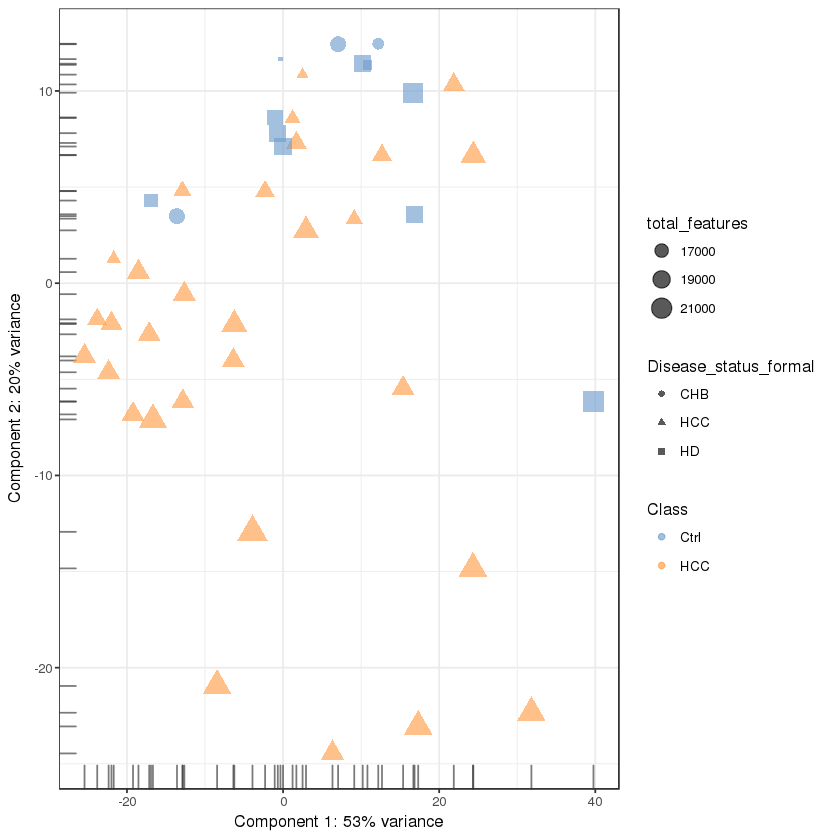

In [119]:
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features"
)

In [120]:
head(counts(reads.qc.impute))
saveRDS(counts(reads.qc.impute), file = "05.matrix/imputation/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim.rds")

lulab_249136_B lulab_385247_B lulab_423976_B
miRNA_ENSG00000278267.1     6           25               3          
miRNA_ENSG00000273874.1     2           21               5          
miRNA_ENSG00000278791.1    14           10              13          
miRNA_ENSG00000207730.3 13980          704            1986          
miRNA_ENSG00000207607.3 13504          617            1598          
miRNA_ENSG00000198976.1  6945          300             962          
                        lulab_497411_B lulab_497497_B lulab_498127_B
miRNA_ENSG00000278267.1    9            10              1           
miRNA_ENSG00000273874.1   16            13              4           
miRNA_ENSG00000278791.1   12            27             12           
miRNA_ENSG00000207730.3 3382           564            430           
miRNA_ENSG00000207607.3 3637           760            666           
miRNA_ENSG00000198976.1 1691           310            209           
                        lulab_498187_B lulab_498221_B lulab_507450_B
miRNA_ENSG00000278267.1    9             8              16          
miRNA_ENSG00000273874.1    5             6              13          
miRNA_ENSG00000278791.1   23             2              87          
miRNA_ENSG00000207730.3 2031           664            1031          
miRNA_ENSG00000207607.3 3214           831            1086          
miRNA_ENSG00000198976.1 1396           279             409          
                        lulab_507468_B ⋯ lulab_Normal_2 lulab_Normal_3
miRNA_ENSG00000278267.1    2           ⋯    8             11          
miRNA_ENSG00000273874.1    2           ⋯    9              4          
miRNA_ENSG00000278791.1    8           ⋯   24            152          
miRNA_ENSG00000207730.3 1295           ⋯ 1422           1121          
miRNA_ENSG00000207607.3 1832           ⋯ 1527           2280          
miRNA_ENSG00000198976.1  220           ⋯  882            892          
                        lulab_Normal_4 lulab_Normal_5 lulab_Normal_6
miRNA_ENSG00000278267.1   0.00          21              12          
miRNA_ENSG00000273874.1   0.00          20              10          
miRNA_ENSG00000278791.1 171.00          36              14          
miRNA_ENSG00000207730.3   4.00         256            2310          
miRNA_ENSG00000207607.3 203.98         224            2128          
miRNA_ENSG00000198976.1  81.44          39             758          
                        lulab_Normal_7 lulab_Normal_8 lulab_HBV_1 lulab_HBV_2
miRNA_ENSG00000278267.1   18              5             12          2        
miRNA_ENSG00000273874.1   16              6             13          7        
miRNA_ENSG00000278791.1    2              8              7          9        
miRNA_ENSG00000207730.3 1748           2501           1355        708        
miRNA_ENSG00000207607.3 1924           1419           1946        448        
miRNA_ENSG00000198976.1  749            519            416        144        
                        lulab_HBV_3
miRNA_ENSG00000278267.1   4        
miRNA_ENSG00000273874.1   1        
miRNA_ENSG00000278791.1  11        
miRNA_ENSG00000207730.3 781        
miRNA_ENSG00000207607.3 639        
miRNA_ENSG00000198976.1 175

**********************
## normalization

In [121]:
reads.qc.impute
#counts logcounts_raw 是取log2的

class: SingleCellExperiment 
dim: 23752 43 
metadata(0):
assays(2): counts logcounts_raw
rownames(23752): miRNA_ENSG00000278267.1 miRNA_ENSG00000273874.1 ...
  mRNA_ENSG00000198695.2 mRNA_ENSG00000198727.2
rowData names(8): is_feature_control mean_counts ... total_counts
  log10_total_counts
colnames(43): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(39): X Unnamed..0 ... pct_counts_top_500_features
  is_cell_control
reducedDimNames(0):
spikeNames(0):

In [122]:
sum(counts(reads.qc.impute)<0)

[1] 0

In [123]:
top50 = c('Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199075.1',
       'miRNA_ENSG00000207789.1', 'miRNA_ENSG00000283450.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000283935.1', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1',
       'miRNA_ENSG00000283733.1', 'miRNA_ENSG00000199072.3',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000207547.1',
       'miRNA_ENSG00000283705.1', 'miRNA_ENSG00000284538.1',
       'miRNA_ENSG00000283824.1', 'miRNA_ENSG00000208037.1',
       'miRNA_ENSG00000284353.1', 'miRNA_ENSG00000207605.3',
       'miRNA_ENSG00000198987.1', 'miRNA_ENSG00000198974.3',
       'miRNA_ENSG00000208023.3', 'miRNA_ENSG00000207808.1',
       'miRNA_ENSG00000199165.3', 'miRNA_ENSG00000283990.1',
       'miRNA_ENSG00000198975.2', 'miRNA_ENSG00000199133.3',
       'miRNA_ENSG00000254324.3', 'miRNA_ENSG00000207870.1',
       'Y_RNA_ENSG00000201405.1', 'snoRNA_ENSG00000277846.1',
       'miRNA_ENSG00000207638.1', 'miRNA_ENSG00000283926.1',
       'miRNA_ENSG00000199065.3', 'miRNA_ENSG00000207721.1',
       'lncRNA_ENSG00000234741.7', 'miRNA_ENSG00000199135.1',
       'miRNA_ENSG00000283819.1', 'snoRNA_ENSG00000200084.1',
       'piRNA_piR-hsa-1177', 'snoRNA_ENSG00000276788.1',
       'miRNA_ENSG00000207864.3', 'Y_RNA_ENSG00000199200.2')

In [124]:
top50[1:4]

[1] "Y_RNA_ENSG00000201778.1" "miRNA_ENSG00000284565.1"
[3] "miRNA_ENSG00000284440.1" "miRNA_ENSG00000284190.1"

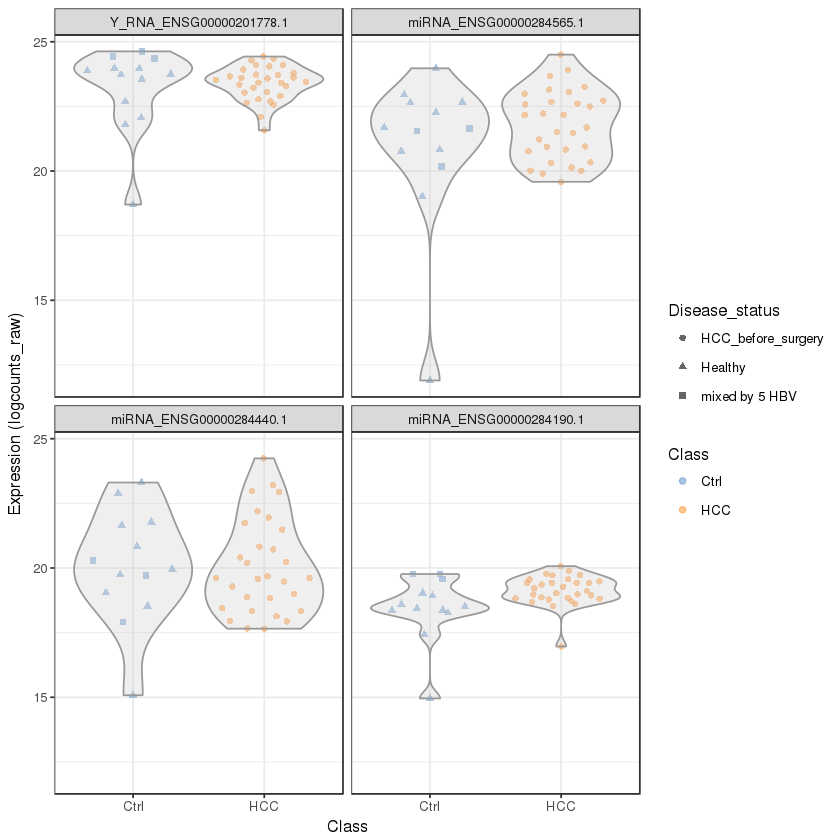

In [125]:
# log2 raw counts
plotExpression(reads.qc.impute, top50[1:4],
    colour_by = "Class", shape_by = "Disease_status",
    x = "Class", exprs_values="logcounts_raw")

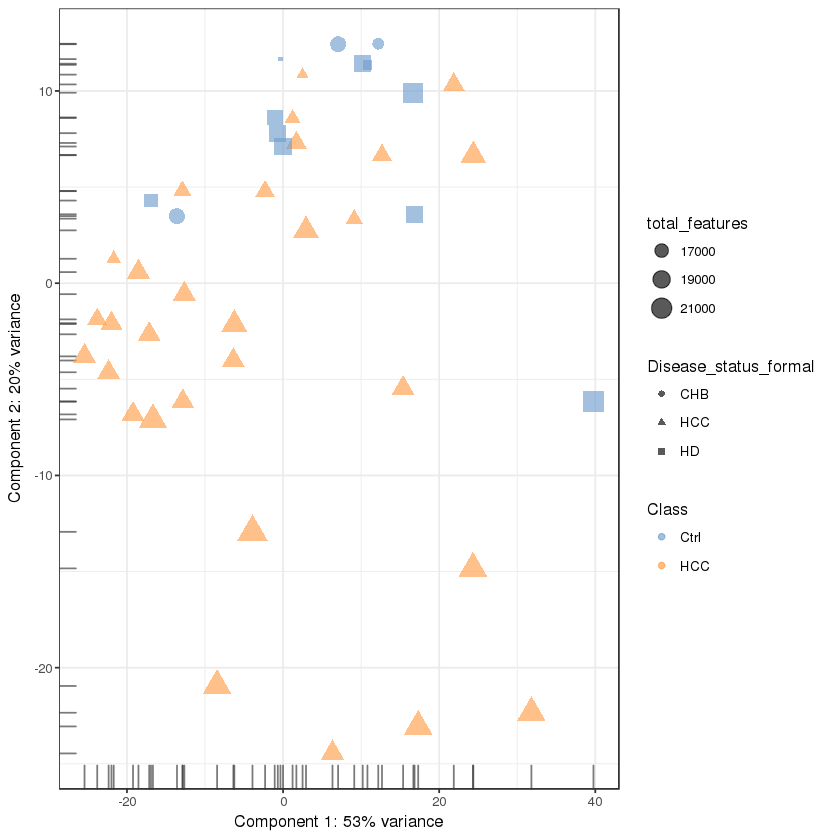

In [126]:
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features"
)

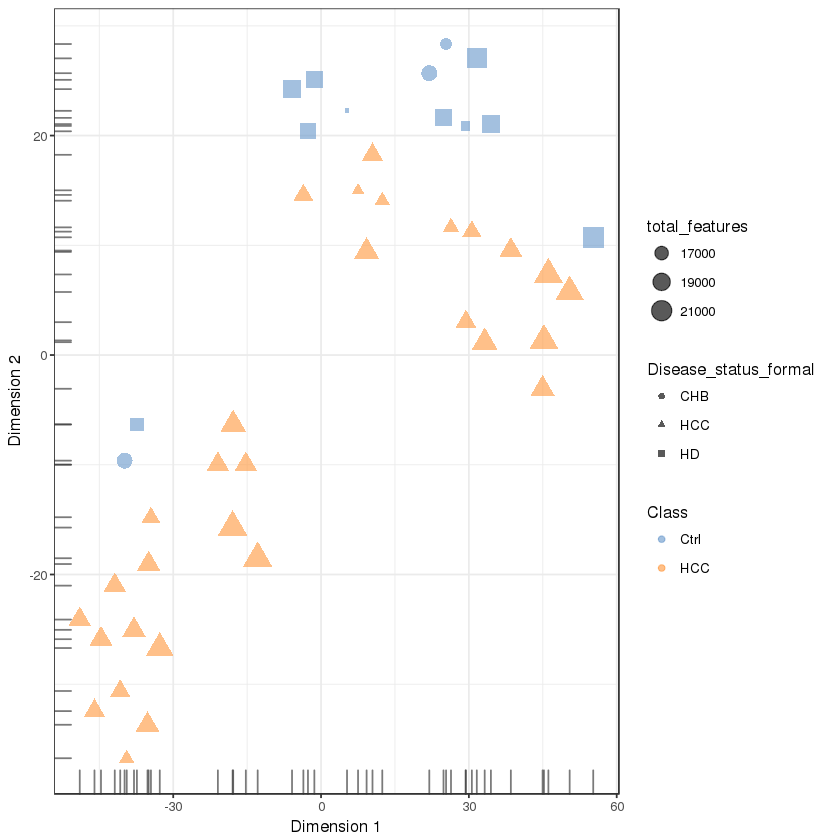

In [127]:
plotTSNE(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    rand_seed = 123456,
    ntop = 300
)

In [128]:
# CPM
logcounts(reads.qc.impute) <- log2(calculateCPM(reads.qc.impute, use.size.factors = FALSE) + 1)

In [129]:
# scran (CPM)
library(scran)
# define cluster for each sample
sampleLables <- c()
for(i in colnames(reads.qc.impute)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

# sampleLables <- quickCluster(reads.qc.impute, min.size = 10)
sampleLables <- replace(sampleLables, which(sampleLables=="HCC"),1)
sampleLables <- replace(sampleLables, which(sampleLables=="Ctrl"),2)
sampleLables <- as.numeric(sampleLables)
reads.qc.impute <- computeSumFactors(reads.qc.impute, sizes = 4, clusters = sampleLables)
reads.qc.impute <- normalize(reads.qc.impute)

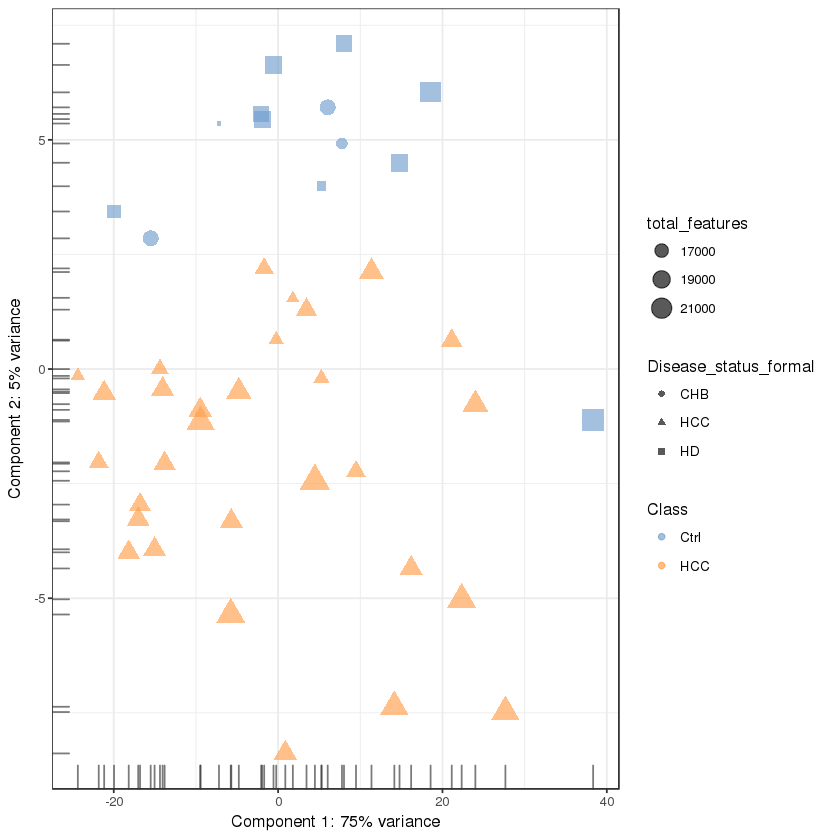

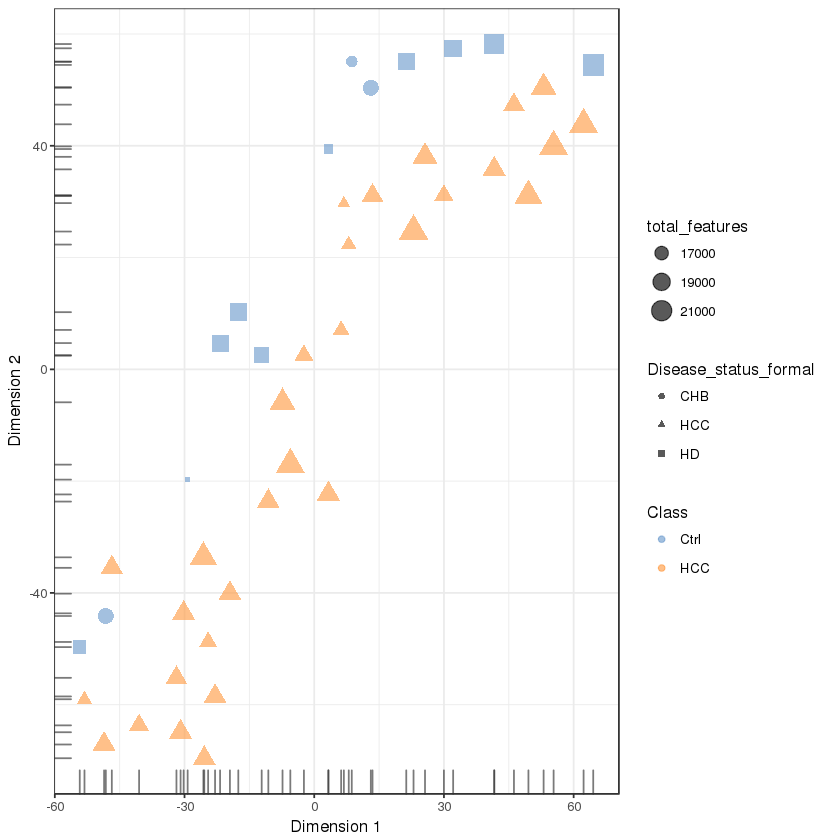

In [130]:
plotPCA(
    reads.qc.impute,
    exprs_values = "logcounts",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    ntop = 300
)

plotTSNE(
    reads.qc.impute,
    exprs_values = "logcounts",
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    rand_seed = 123456,
    ntop = 300
)

plotRLE(
    reads.qc.impute,
    exprs_mats = list(Raw = "counts", scran = "logcounts"),
    exprs_logged = c(TRUE, TRUE),
    colour_by = "Disease_status",
    legend = "auto"
)

***********************
## Dealing with confounders

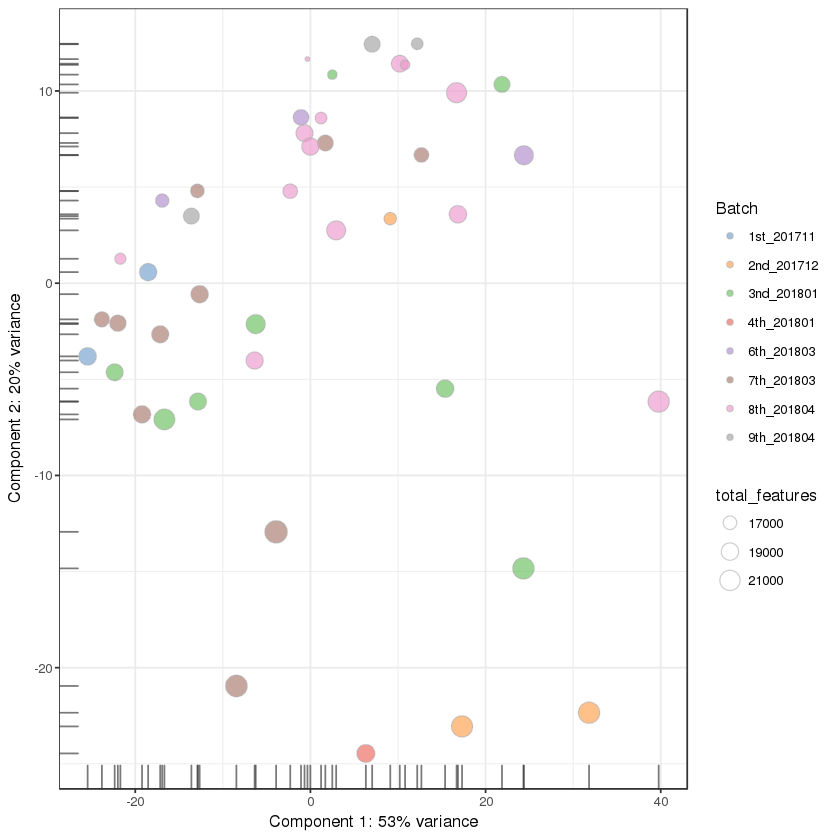

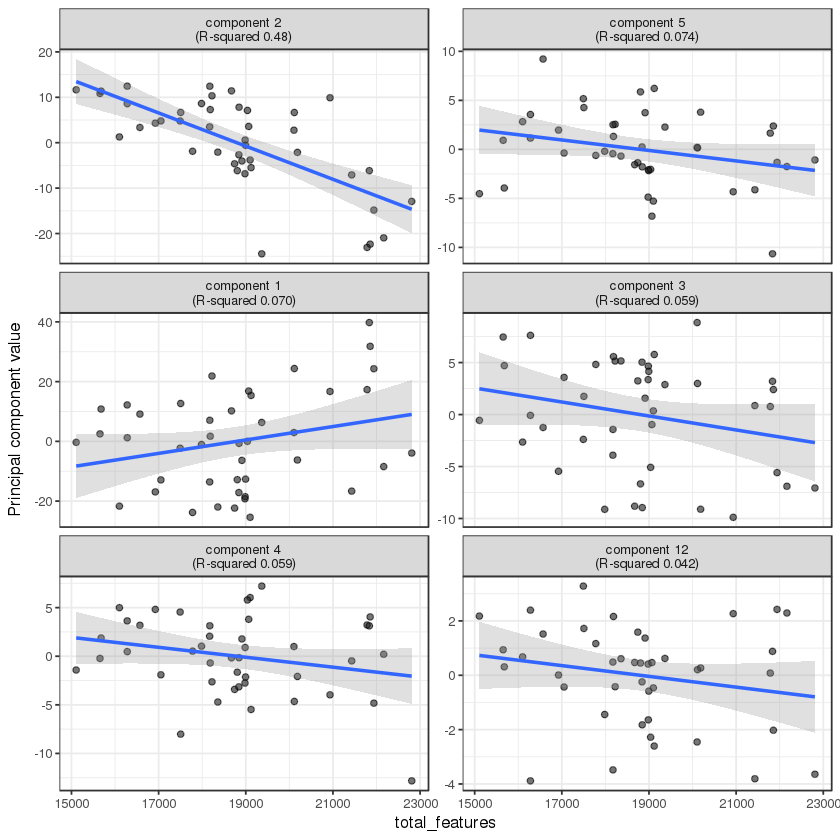

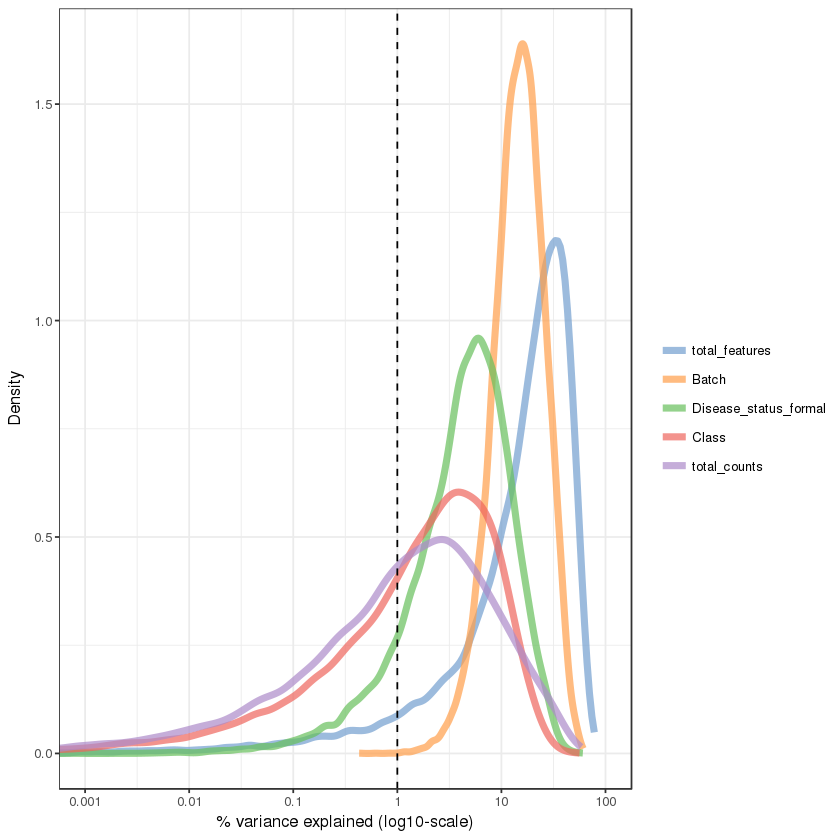

In [131]:
## check confounders
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Batch",
    size_by = "total_features"
)
plotQC(
    reads.qc.impute[endog_genes, ],
    type = "find-pcs",
    exprs_values = "logcounts_raw",
    variable = "total_features"
)

plotQC(
    reads.qc.impute[endog_genes, ],
    type = "expl",
    exprs_values = "logcounts_raw",
    variables = c(
        "total_features",
        "total_counts",
        "Batch",
        "Disease_status_formal",
        "Class"
    )
)

### remove batch effect using enfogenous genes

In [132]:
library(EDASeq)
library(RUVSeq)
library(sva)
library(scRNA.seq.funcs)

In [277]:
length(getLoadedDLLs())

[1] 106

####  using RUVseq (RUVs)

In [155]:
scIdx <- matrix(-1, ncol = max(table(reads.qc.impute$Class)), nrow = 5)
scIdx

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] -1   -1   -1   -1   -1   -1   -1   -1   -1   -1    ⋯     -1    -1    -1   
[2,] -1   -1   -1   -1   -1   -1   -1   -1   -1   -1    ⋯     -1    -1    -1   
[3,] -1   -1   -1   -1   -1   -1   -1   -1   -1   -1    ⋯     -1    -1    -1   
[4,] -1   -1   -1   -1   -1   -1   -1   -1   -1   -1    ⋯     -1    -1    -1   
[5,] -1   -1   -1   -1   -1   -1   -1   -1   -1   -1    ⋯     -1    -1    -1   
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,] -1    -1    -1    -1    -1    -1    -1   
[2,] -1    -1    -1    -1    -1    -1    -1   
[3,] -1    -1    -1    -1    -1    -1    -1   
[4,] -1    -1    -1    -1    -1    -1    -1   
[5,] -1    -1    -1    -1    -1    -1    -1

In [157]:
scIdx <- matrix(-1, ncol = max(table(reads.qc.impute$Class)), nrow = 5)
tmp <- which(reads.qc.impute$Status == "A")
scIdx[1, 1:length(tmp)] <- tmp
tmp <- which(reads.qc.impute$Status == "B")
scIdx[2, 1:length(tmp)] <- tmp
tmp <- which(reads.qc.impute$Status == "C")
scIdx[3, 1:length(tmp)] <- tmp
tmp <- which(reads.qc.impute$Status == "HD")
scIdx[4, 1:length(tmp)] <- tmp
tmp <- which(reads.qc.impute$Status == "CHB")
scIdx[5, 1:length(tmp)] <- tmp
cIdx <- rownames(reads.qc.impute)

In [133]:
# RUVs uses centered (technical) replicate/negative control samples for which the covariates of interest are constant
scIdx <- matrix(-1, ncol = max(table(reads.qc.impute$Class)), nrow = 2)
tmp <- which(reads.qc.impute$Class == "HCC")
scIdx[1, 1:length(tmp)] <- tmp
tmp <- which(reads.qc.impute$Class == "Ctrl")
scIdx[2, 1:length(tmp)] <- tmp
cIdx <- rownames(reads.qc.impute)

In [134]:
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs1") <- ruvs$normalizedCounts

In [158]:
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs1") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 5, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs5") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 10, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs10") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 20, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs20") <- ruvs$normalizedCounts

##### k越大越好，用的feature越多越好

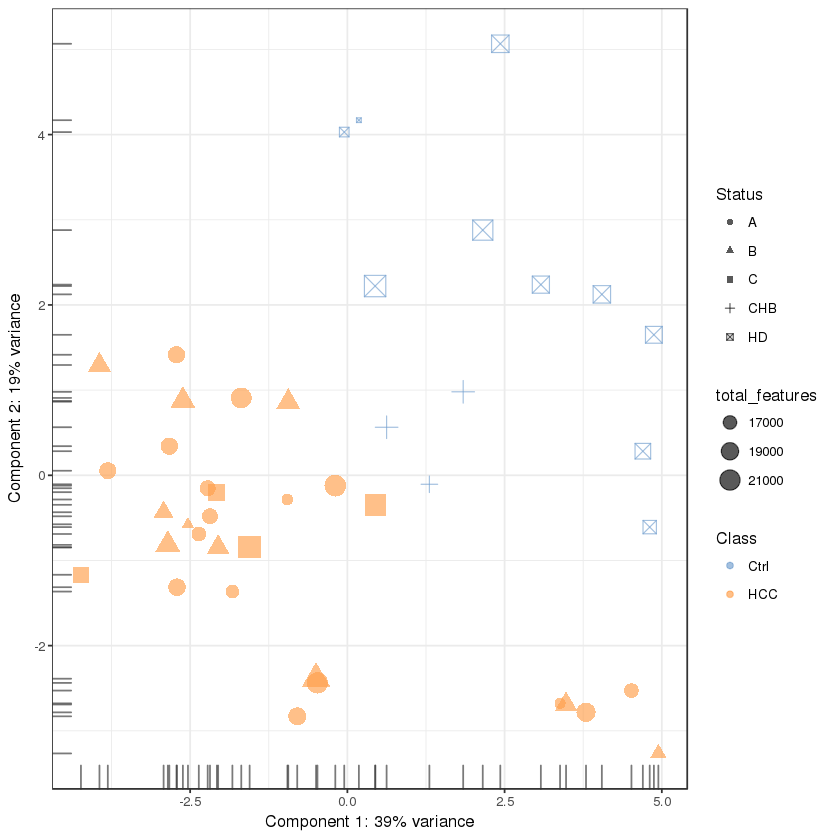

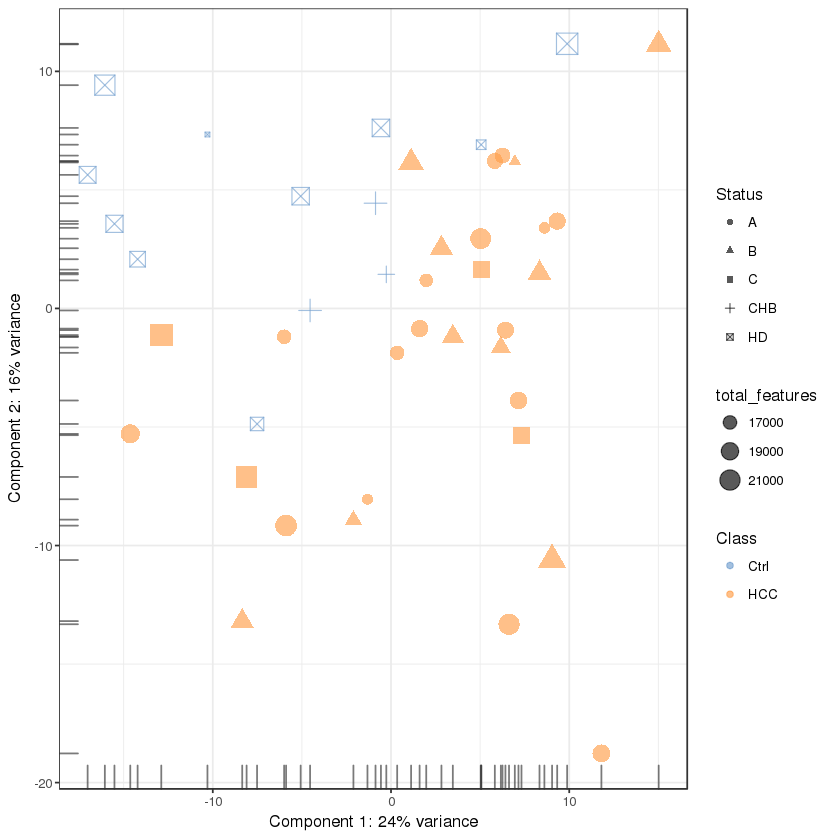

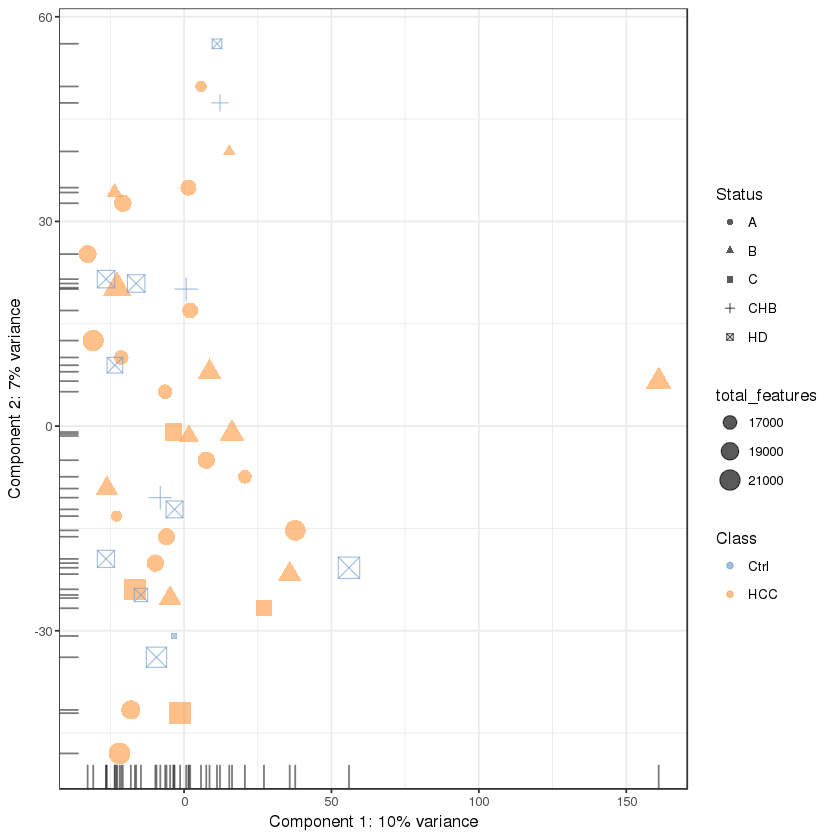

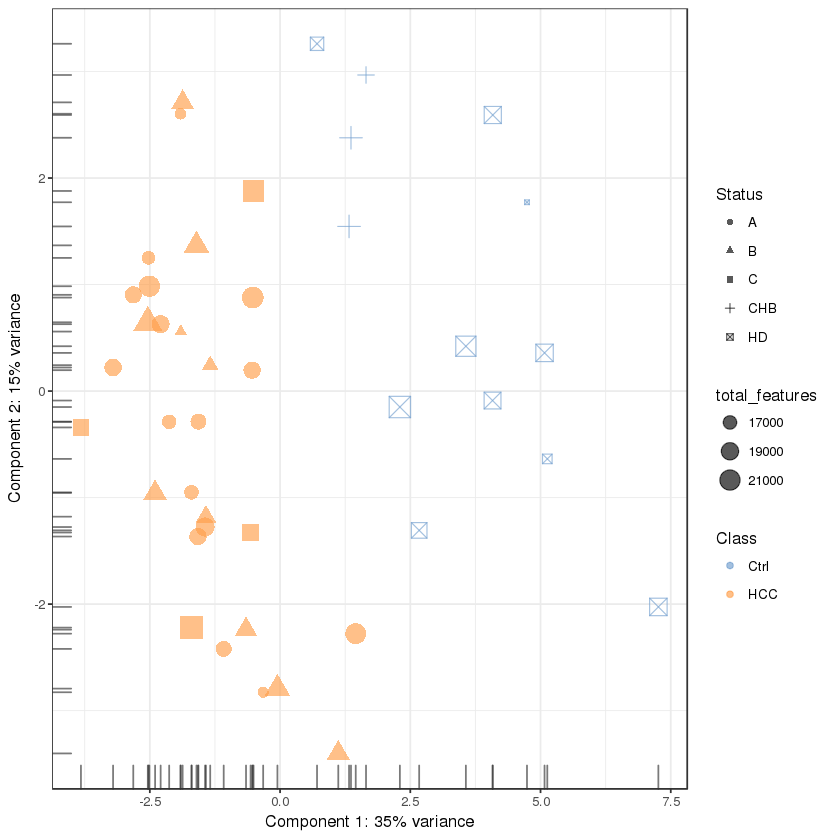

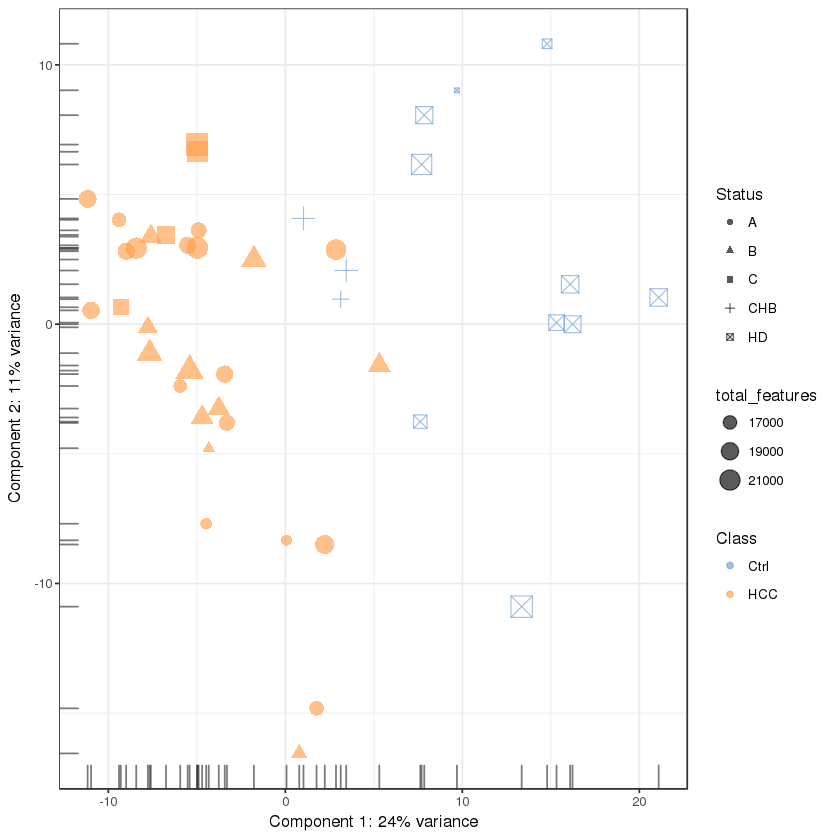

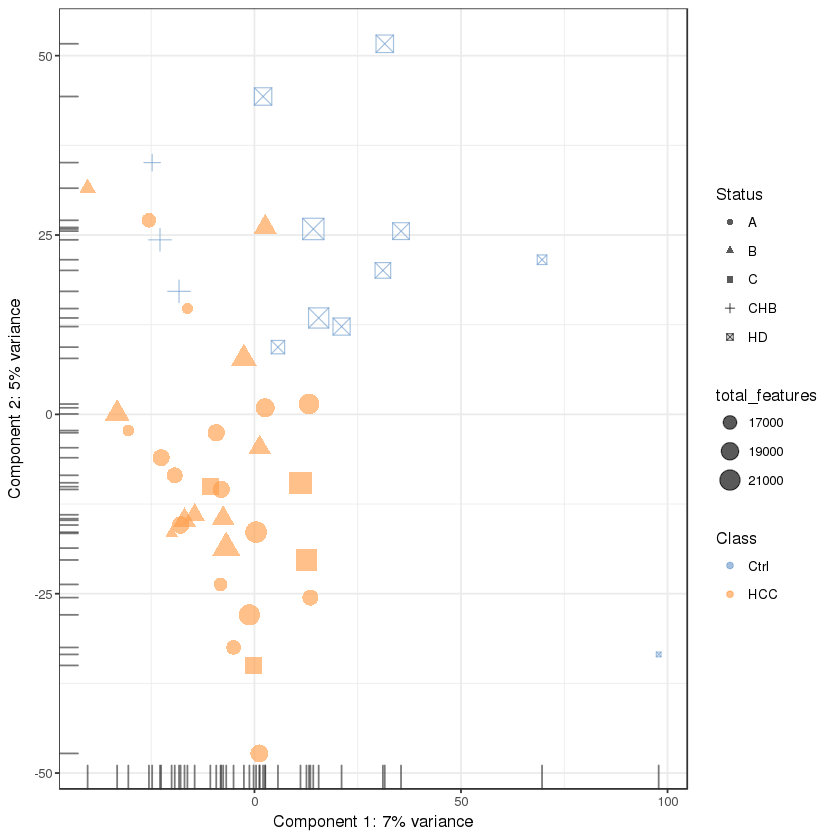

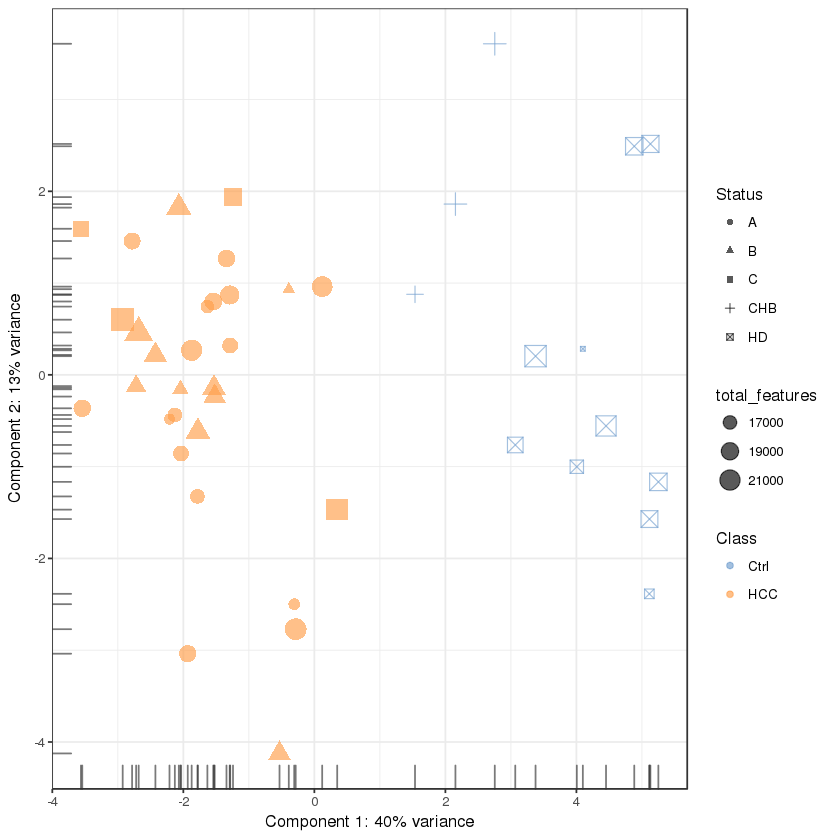

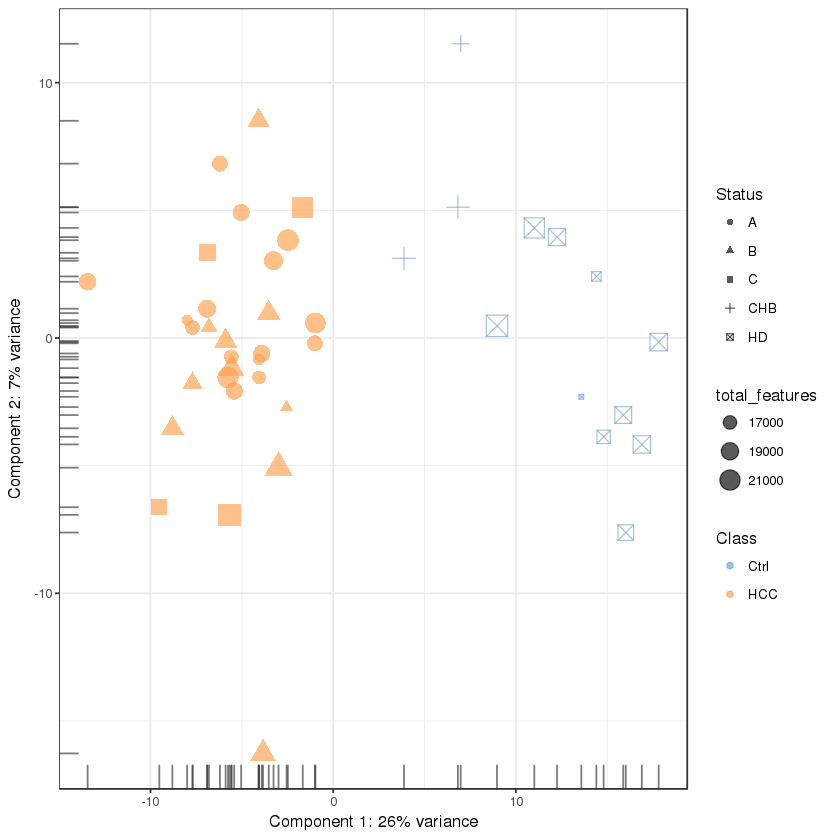

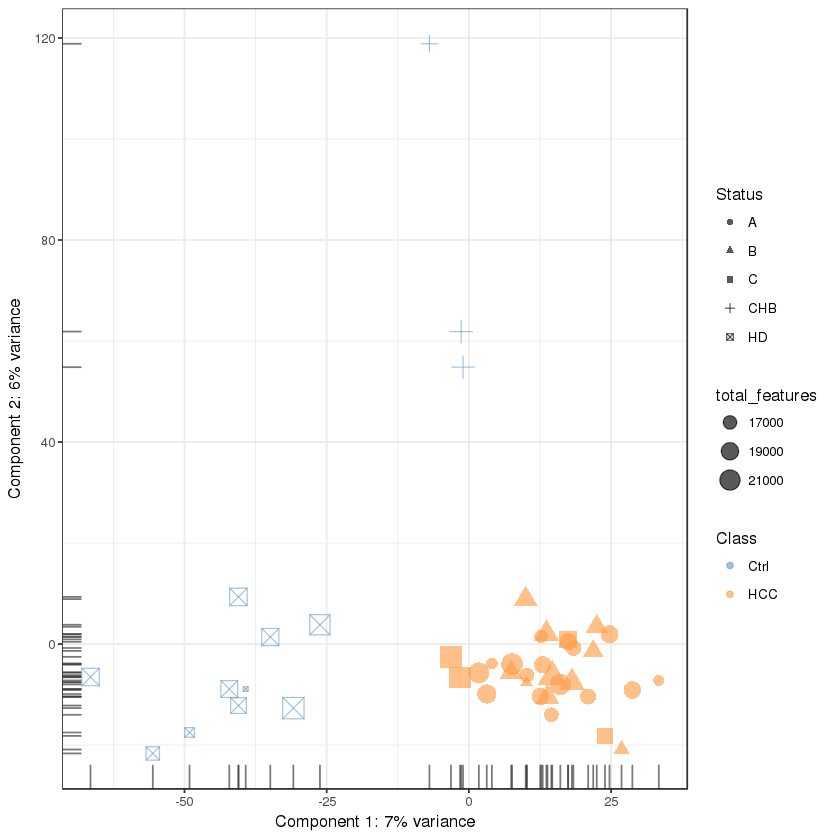

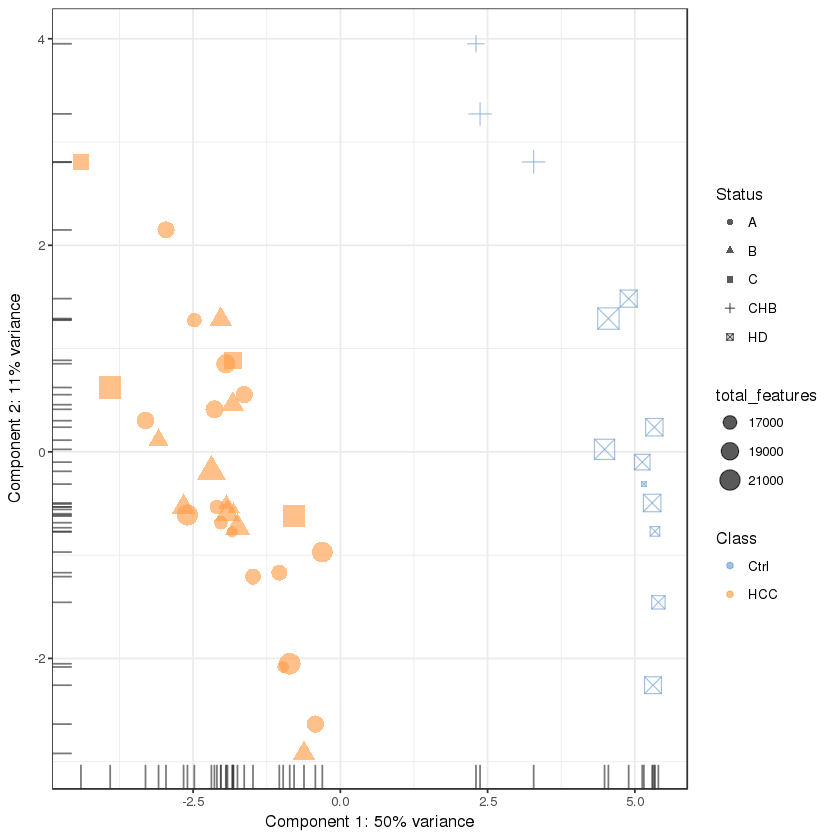

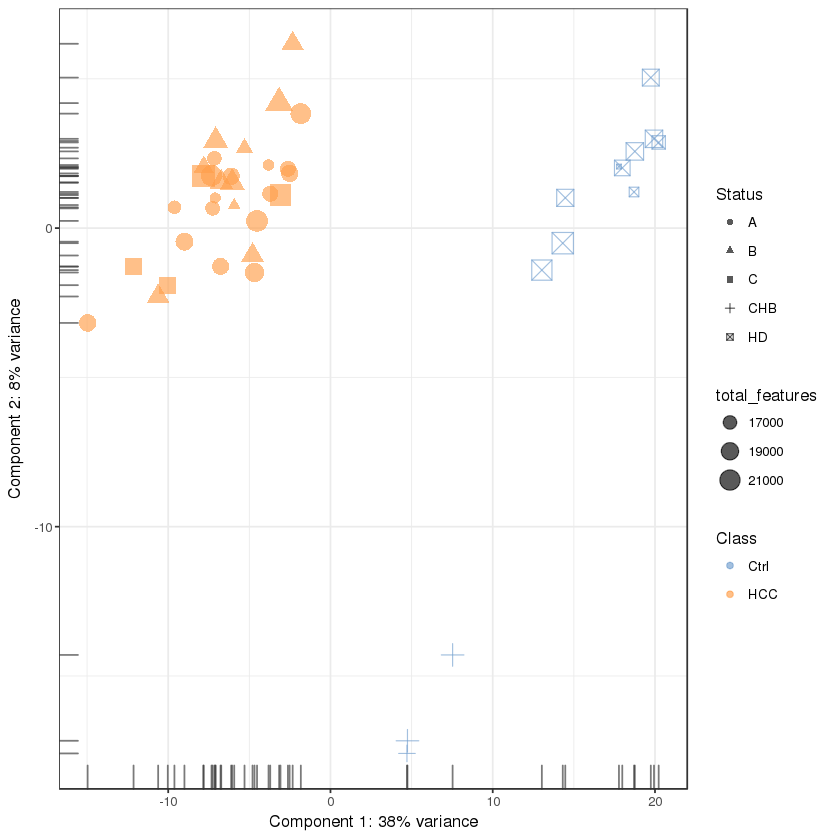

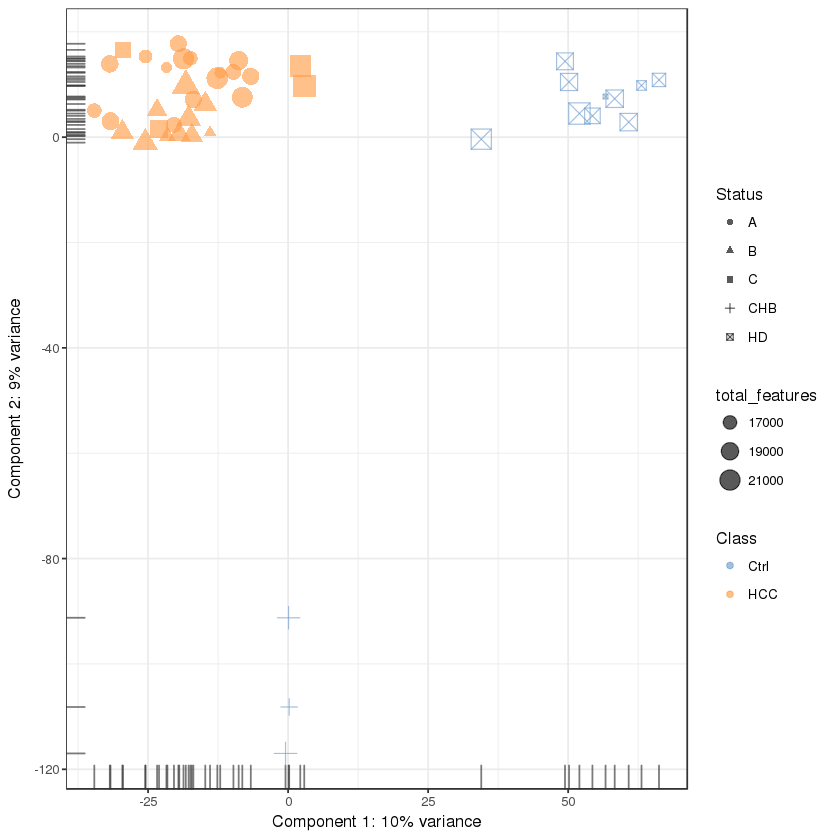

In [161]:
for(i in c('ruvs1','ruvs5','ruvs10','ruvs20')){
    for(j in c(20,300,10000)){
    abc<-plotPCA(
    reads.qc.impute,
    exprs_values = i,
    colour_by = "Class",
    shape_by = "Status",
    size_by = "total_features",
    ntop=j
)     
        print(abc)
    }
}

In [3]:
wholeanno$Status

ERROR: Error in eval(expr, envir, enclos): object 'wholeanno' not found


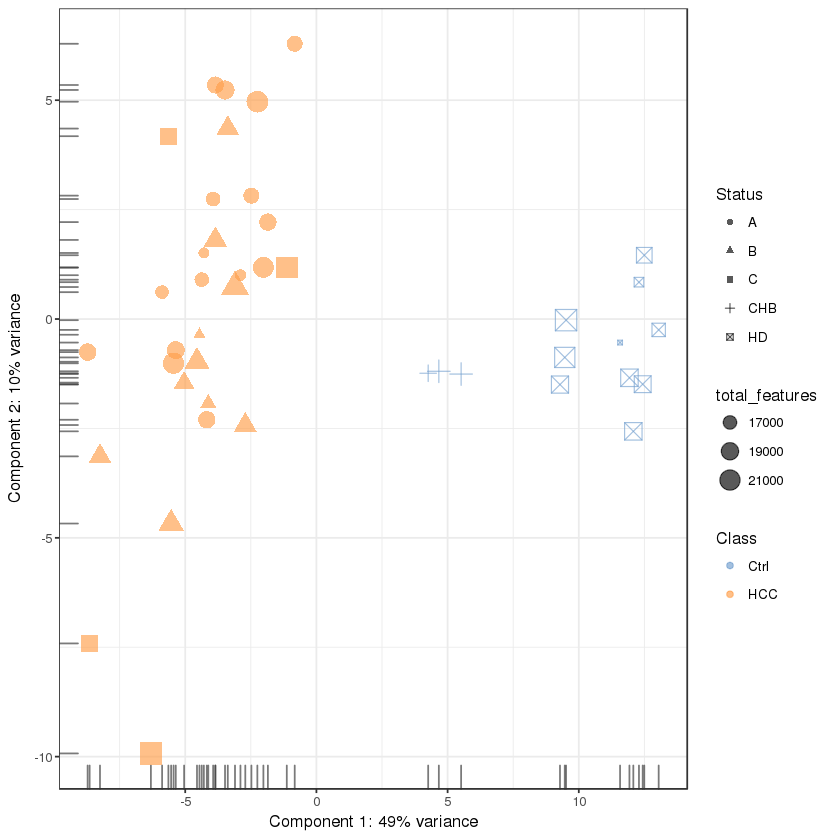

In [160]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Status",
    size_by = "total_features",
    ntop=100
)

Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 10 rows containing non-finite values (stat_density).”

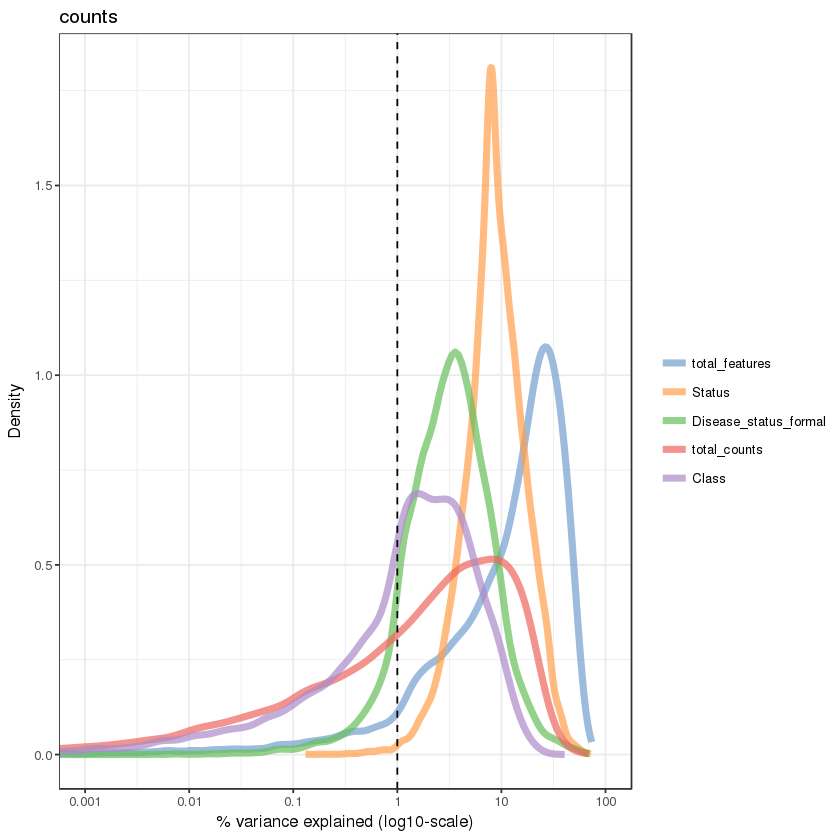

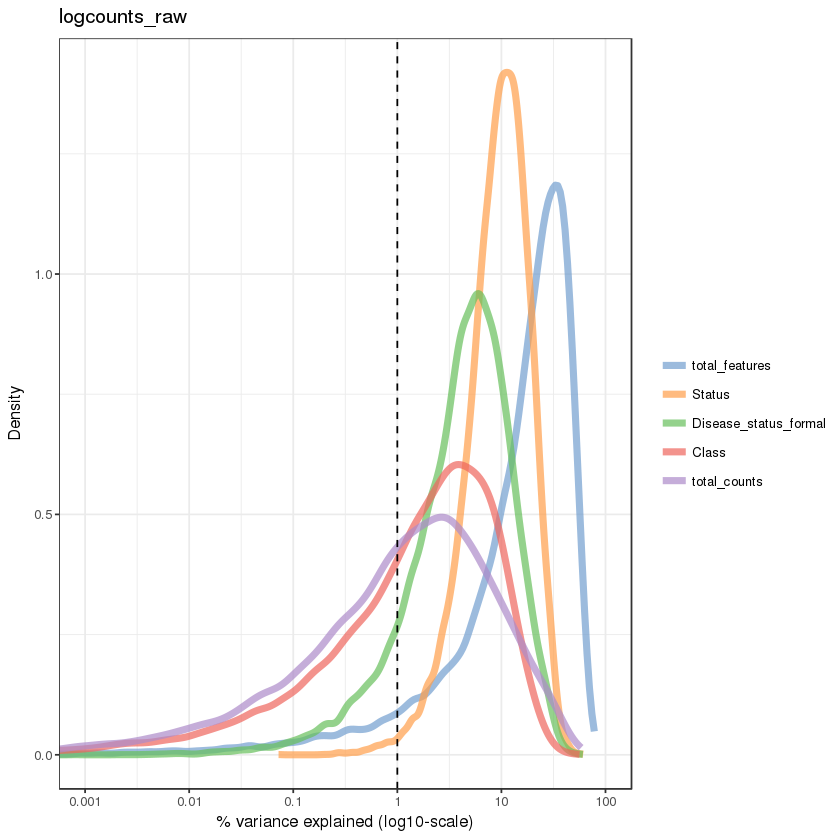

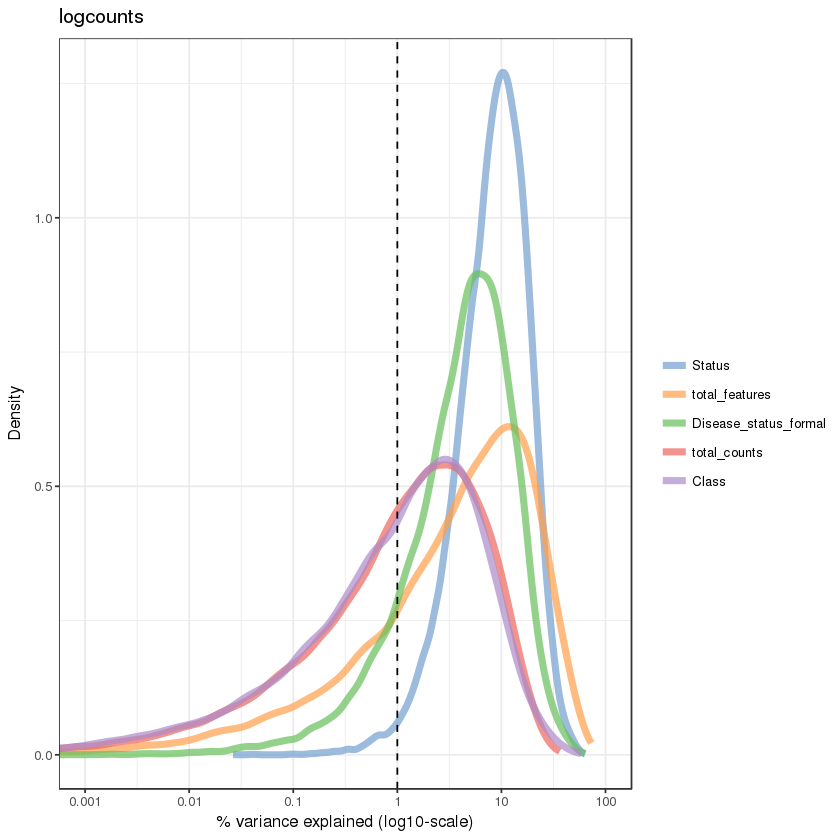

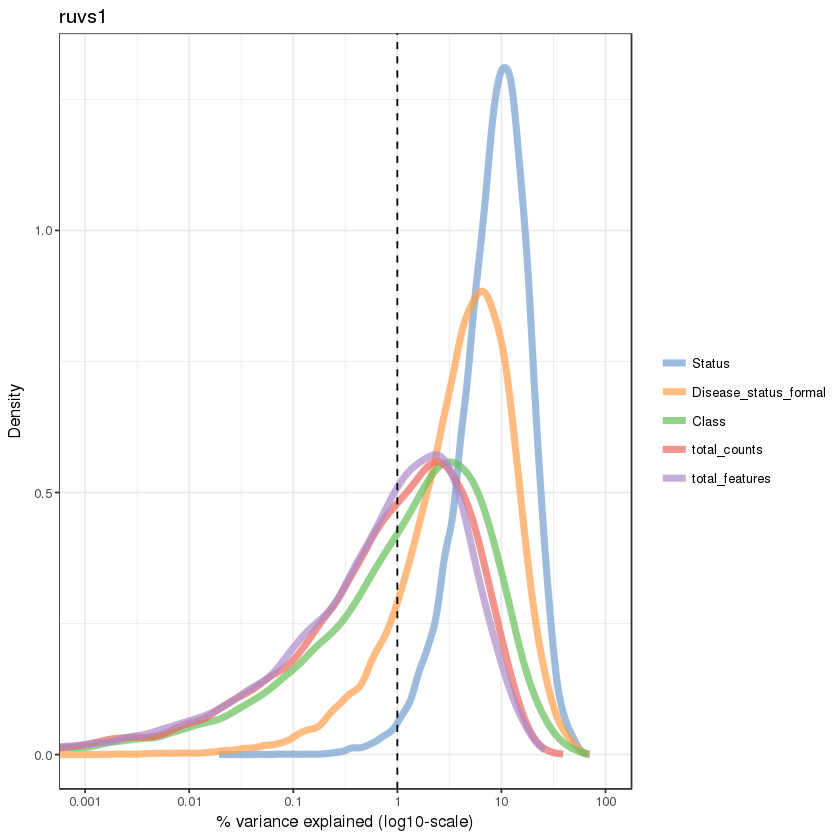

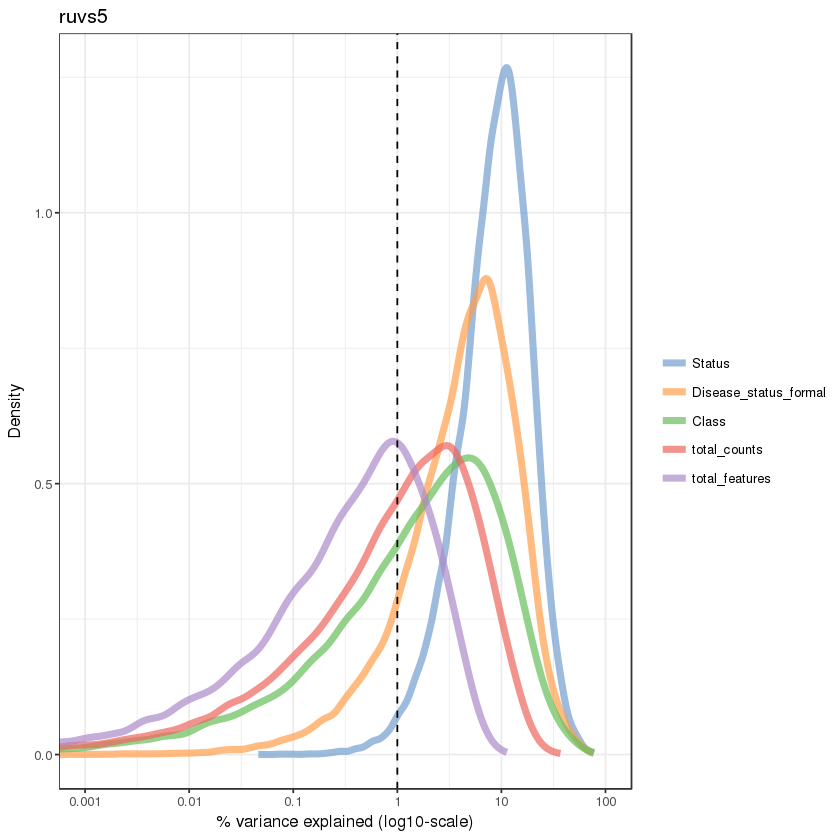

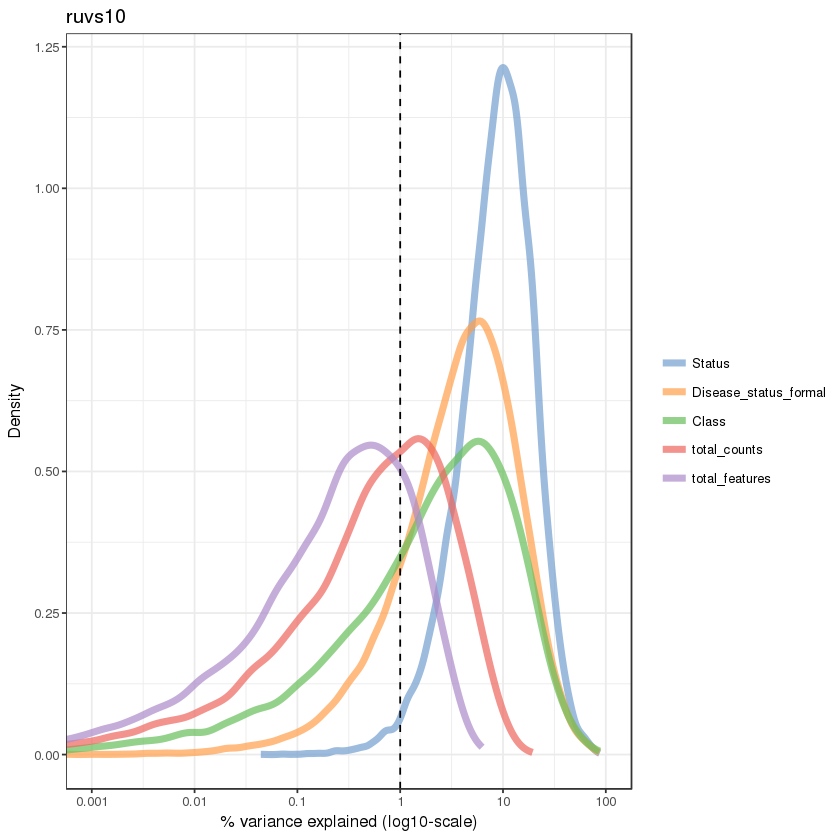

null device 
          1

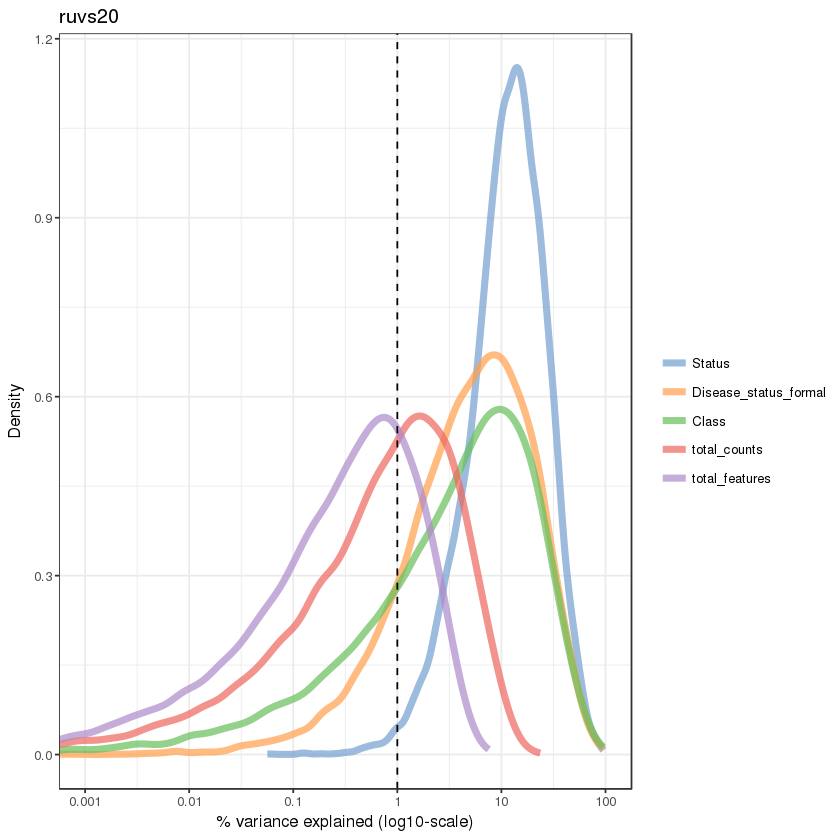

In [138]:
for(n in assayNames(reads.qc.impute)) {
    print(
        plotQC(
            reads.qc.impute,
            type = "expl",
            exprs_values = n,
            variables = c(
                "total_features",
                "total_counts",
                "Status",
                "Disease_status_formal",
                "Class"
            )
        ) +
        ggtitle(n)
    )
}
dev.off()

In [139]:
library(edgeR)
countData <- counts(reads.qc.impute)
design <- wholeanno
design$Class <- "Ctrl"
design[which(design$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"
design <- design[design$Sample_ID %in% colnames(reads.qc.impute),]
colData <- design
design <-model.matrix(~Class, data=colData)

y <- DGEList(countData, samples=colData, group=colData$Class)
y <- calcNormFactors(y)
y <- estimateDisp(y, design)
fit <- glmFit(y, design)
lrt <- glmLRT(fit, coef=2)
top <- topTags(lrt, n=nrow(countData))$table
empirical <- rownames(countData)[which(!(rownames(countData) %in% rownames(top)[1:5000]))]


ruvg <- RUVg(logcounts(reads.qc.impute), empirical, k = 10, isLog = TRUE)
assay(reads.qc.impute, "ruvg10") <- ruvg$normalizedCounts
ruvg <- RUVg(logcounts(reads.qc.impute), empirical, k = 20, isLog = TRUE)
assay(reads.qc.impute, "ruvg20") <- ruvg$normalizedCounts


In [140]:
# using Combat
combat_data <- logcounts(reads.qc.impute)
mod_data <- as.data.frame(t(combat_data))
# Basic batch removal
mod0 = model.matrix(~ 1, data = mod_data) 
# Preserve biological variability
mod1 = model.matrix(~ reads.qc.impute$Class, data = mod_data) 
# adjust for total genes detected
mod2 = model.matrix(~ reads.qc.impute$total_features, data = mod_data)
assay(reads.qc.impute, "combat") <- ComBat(
    dat = t(mod_data), 
    batch = factor(reads.qc.impute$Batch), 
    mod = mod1,
    par.prior = TRUE,
    prior.plots = FALSE
)

Found8batches
Note: one batch has only one sample, setting mean.only=TRUE
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [141]:
# using GLM
glm_fun <- function(g, batch, class) {
  model <- glm(g ~ batch + class)
  model$coef[1] <- 0 # replace intercept with 0 to preserve reference batch.
  return(model$coef)
}
effects <- apply(
    logcounts(reads.qc.impute), 
    1, 
    glm_fun, 
    batch = reads.qc.impute$Batch, 
    class = reads.qc.impute$Class
)
corrected <- logcounts(reads.qc.impute) - t(effects[as.numeric(factor(reads.qc.impute$Batch)), ])
assay(reads.qc.impute, "glm") <- corrected

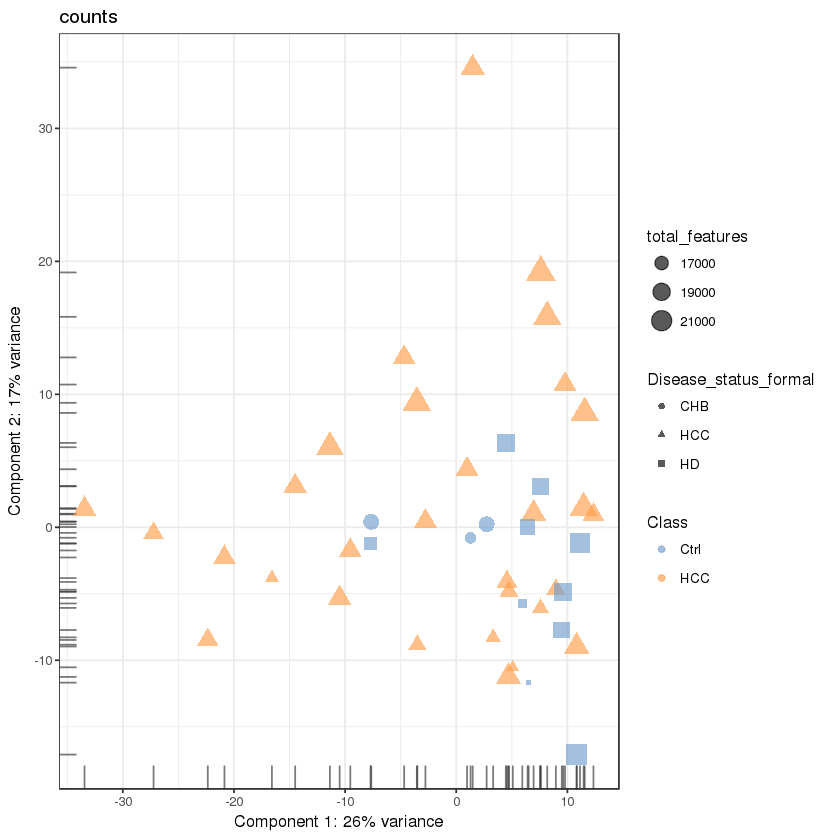

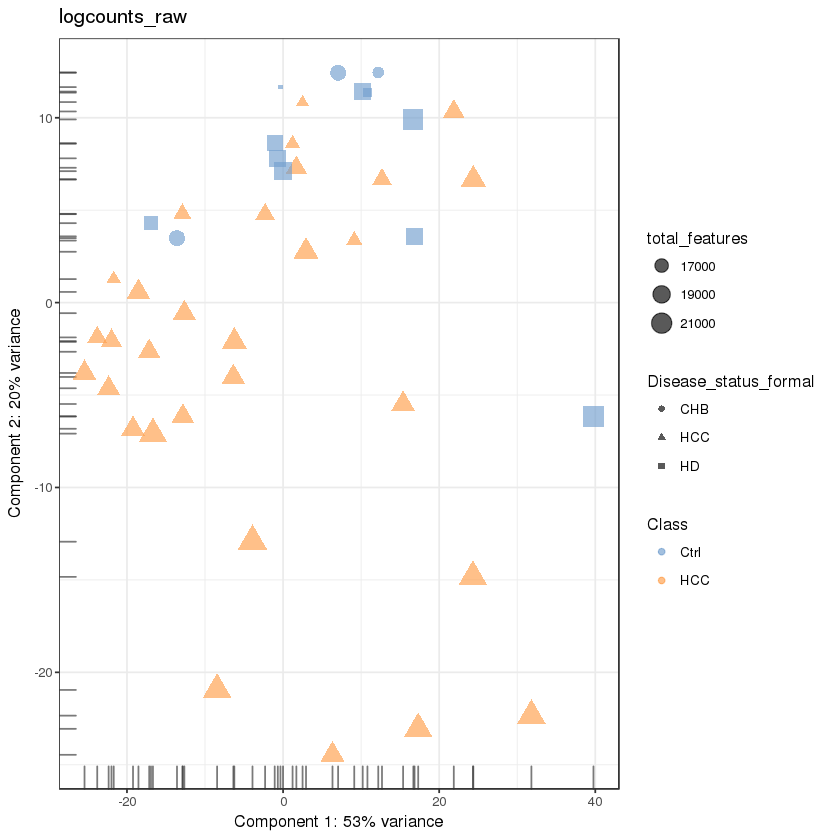

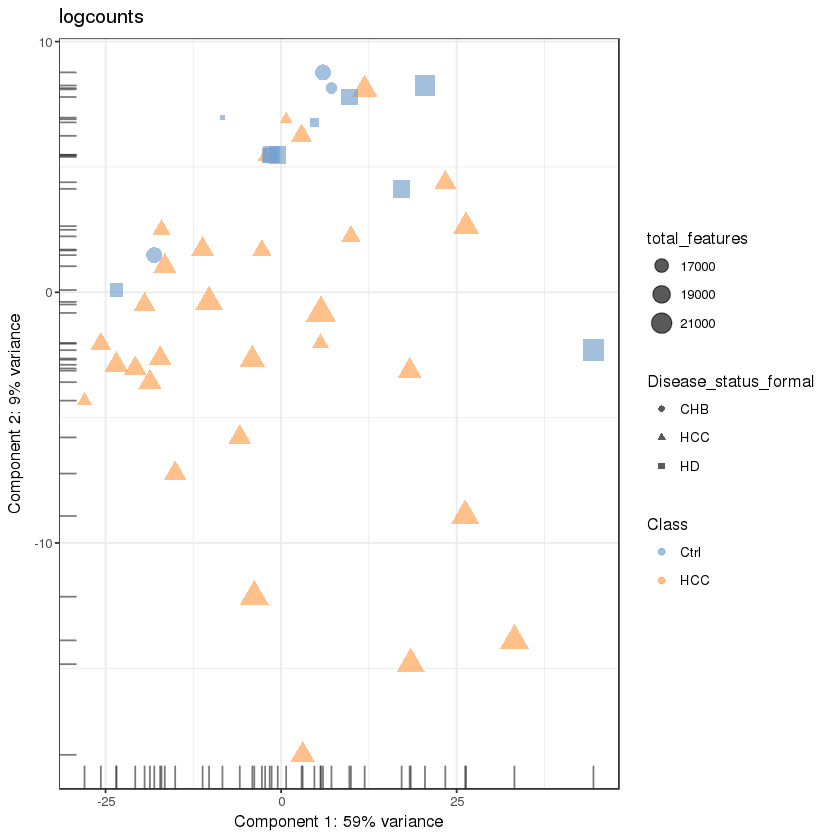

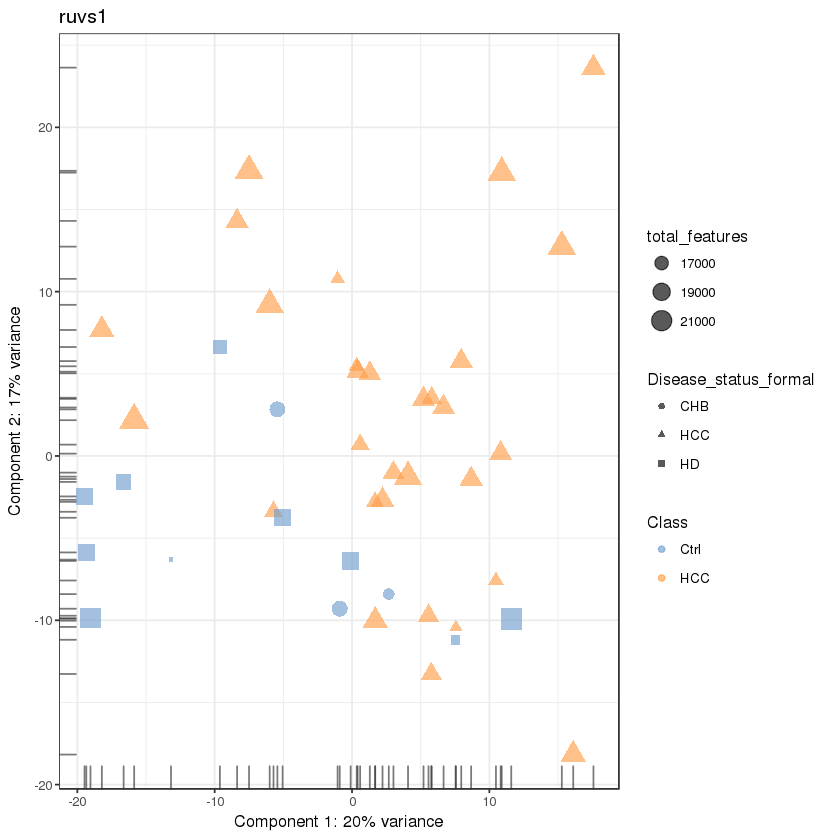

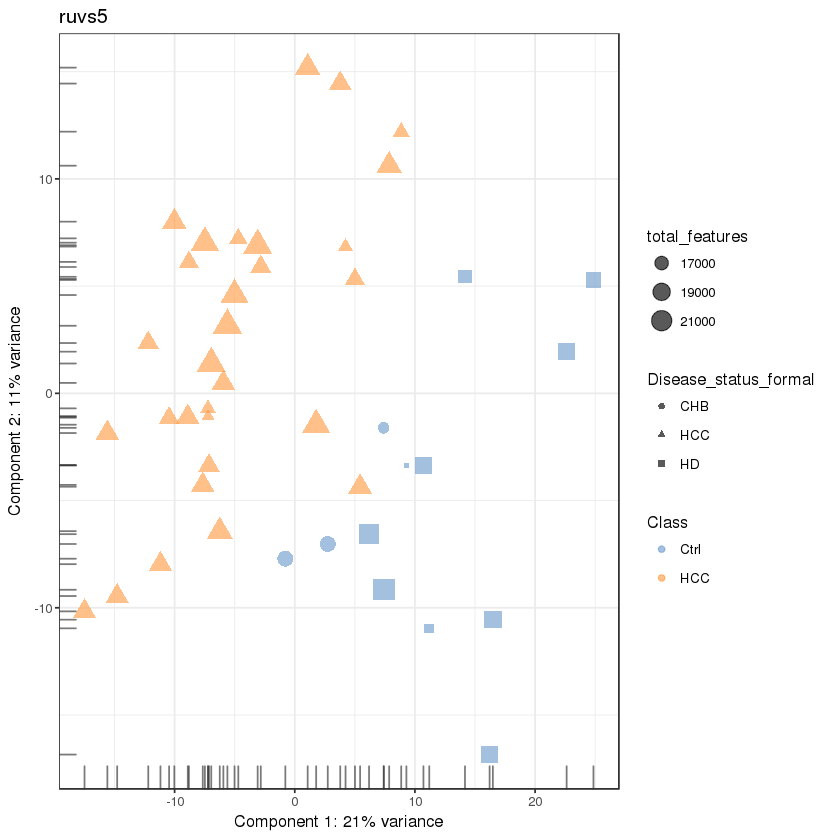

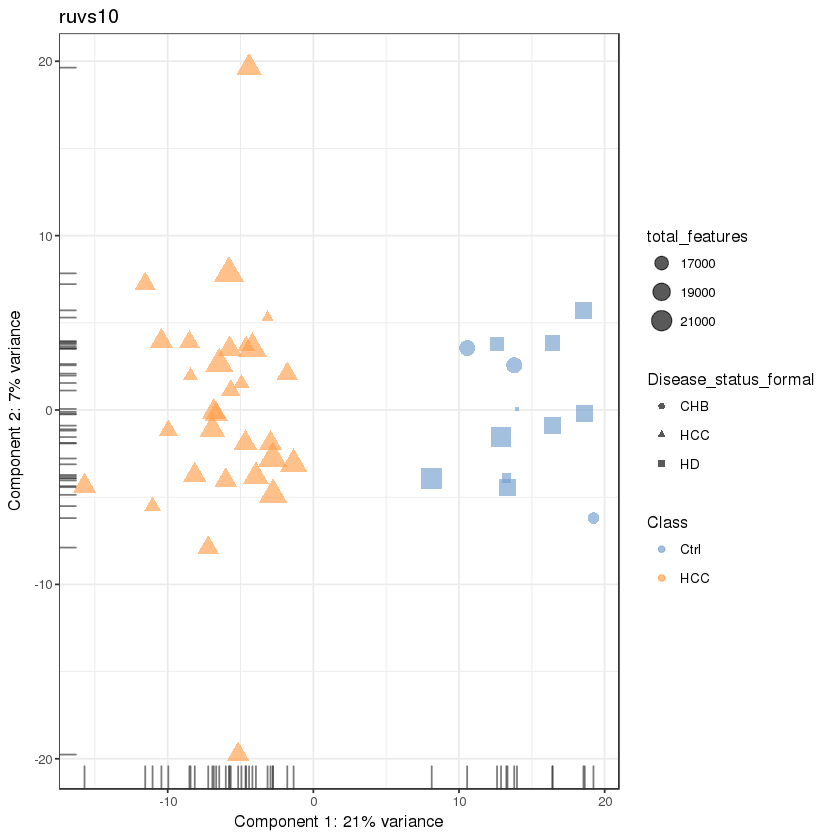

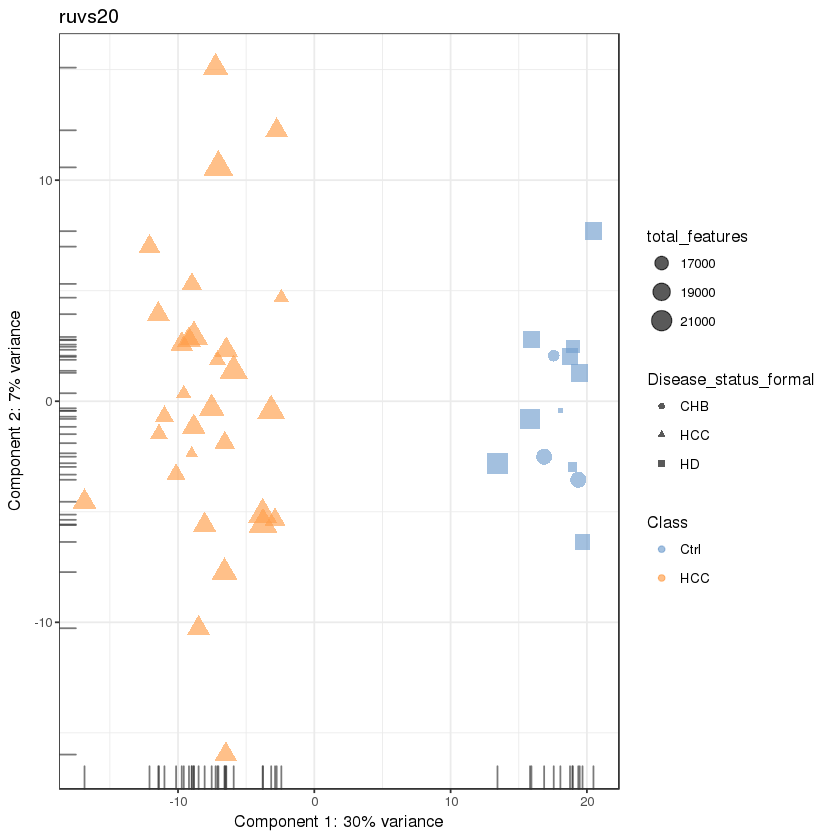

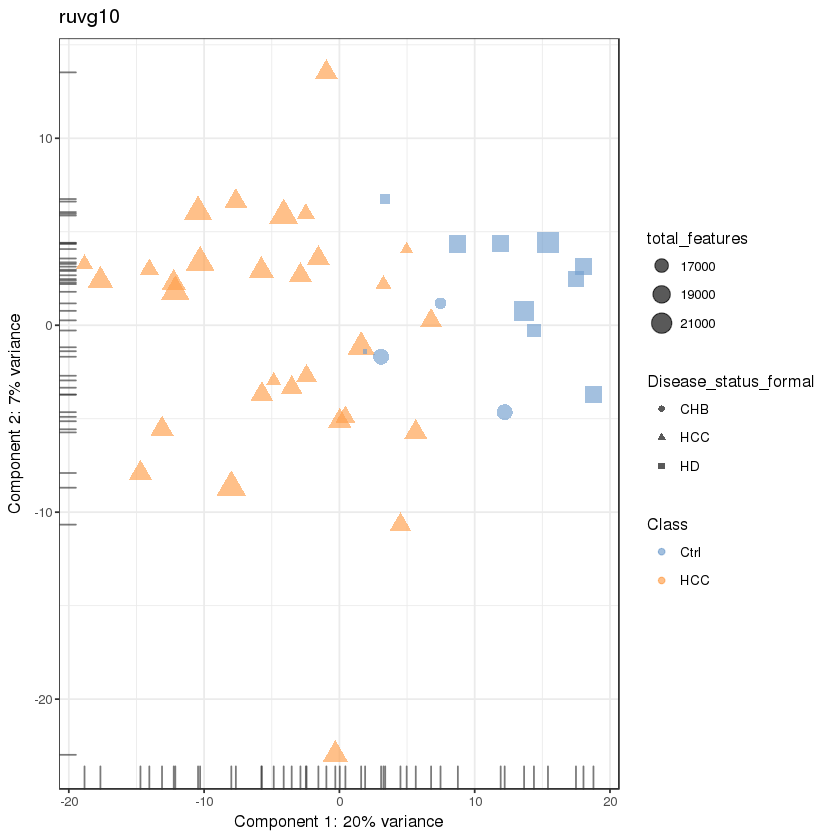

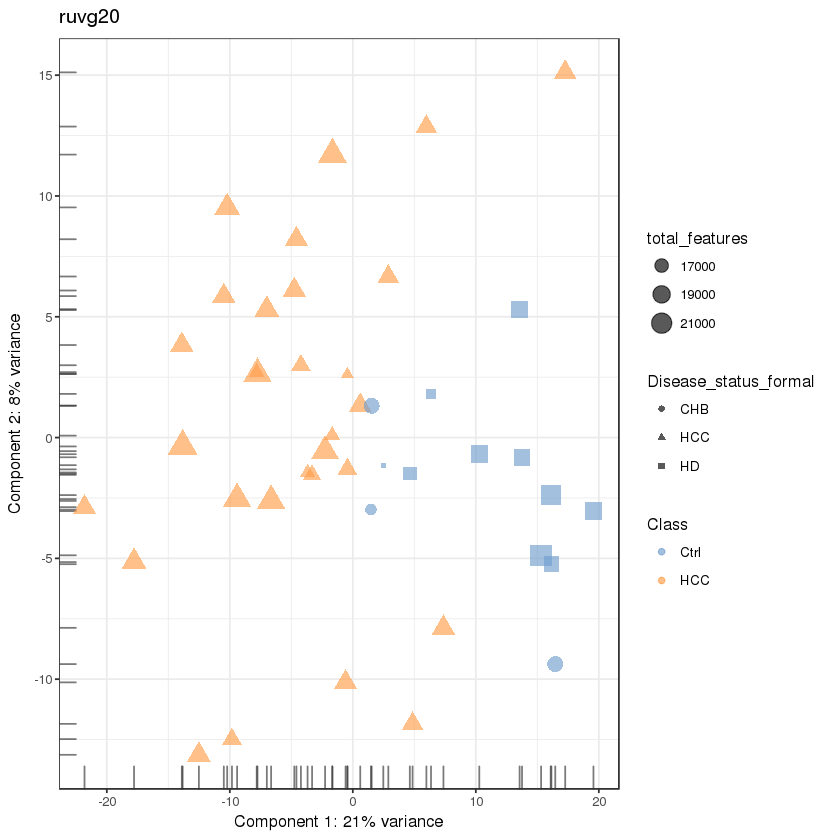

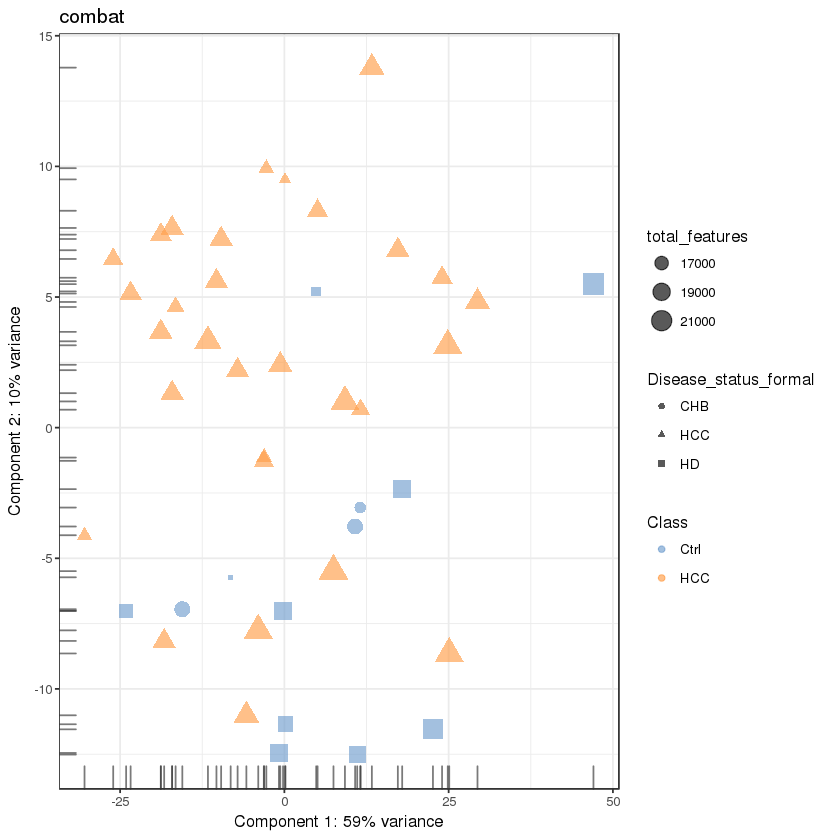

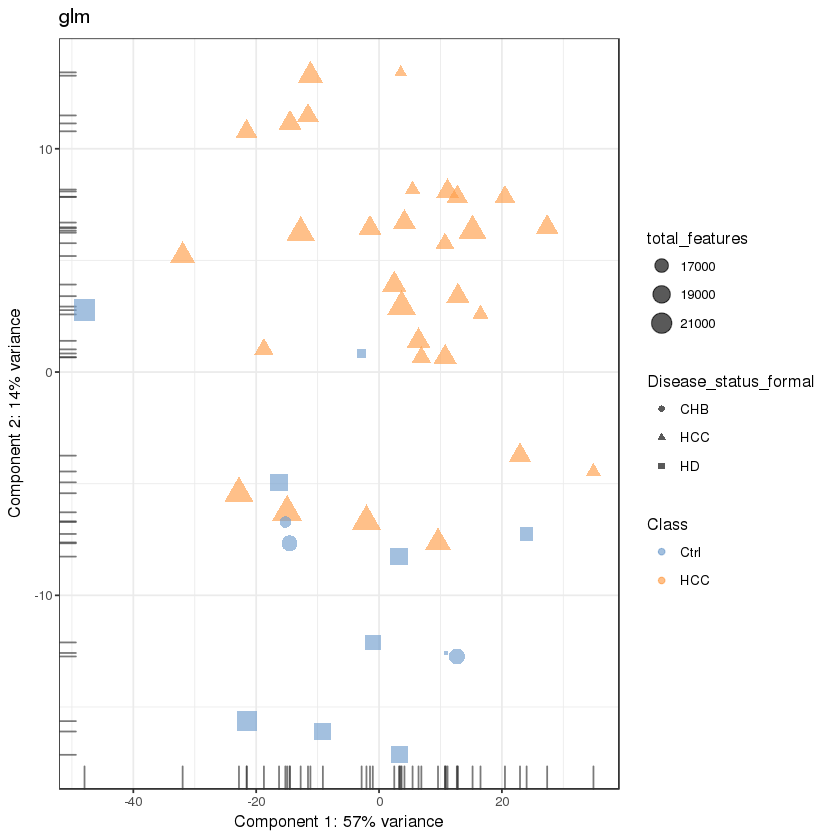

In [142]:
# check PCA
for(n in assayNames(reads.qc.impute)) {
    print(
        plotPCA(
            reads.qc.impute[endog_genes, ],
            colour_by = "Class",
            size_by = "total_features",
            shape_by = "Disease_status_formal",
            exprs_values = n
        ) +
        ggtitle(n)
    )
}

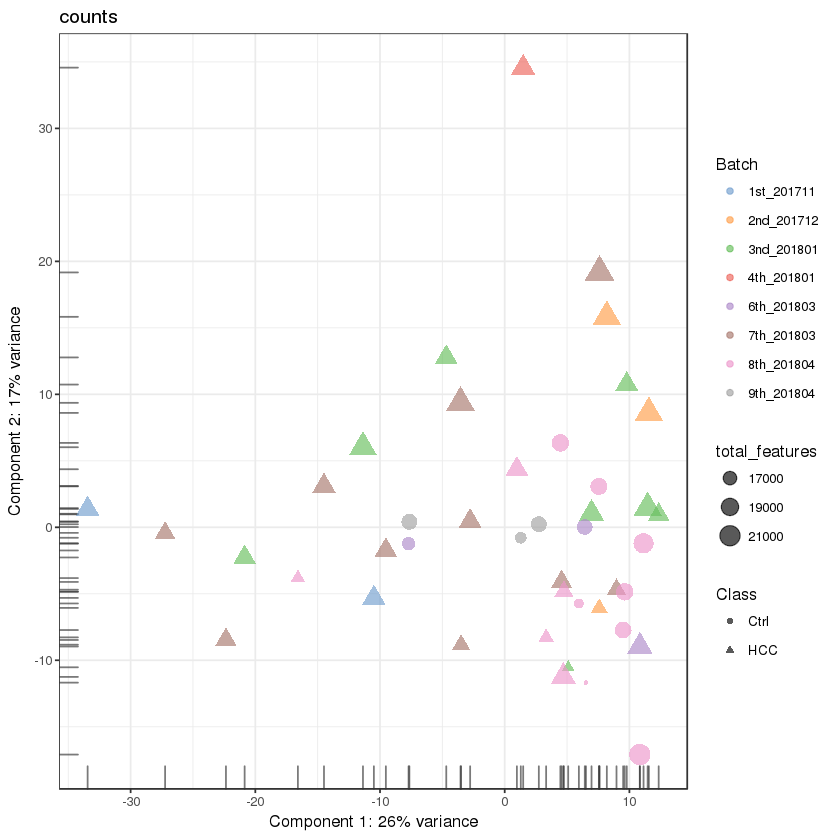

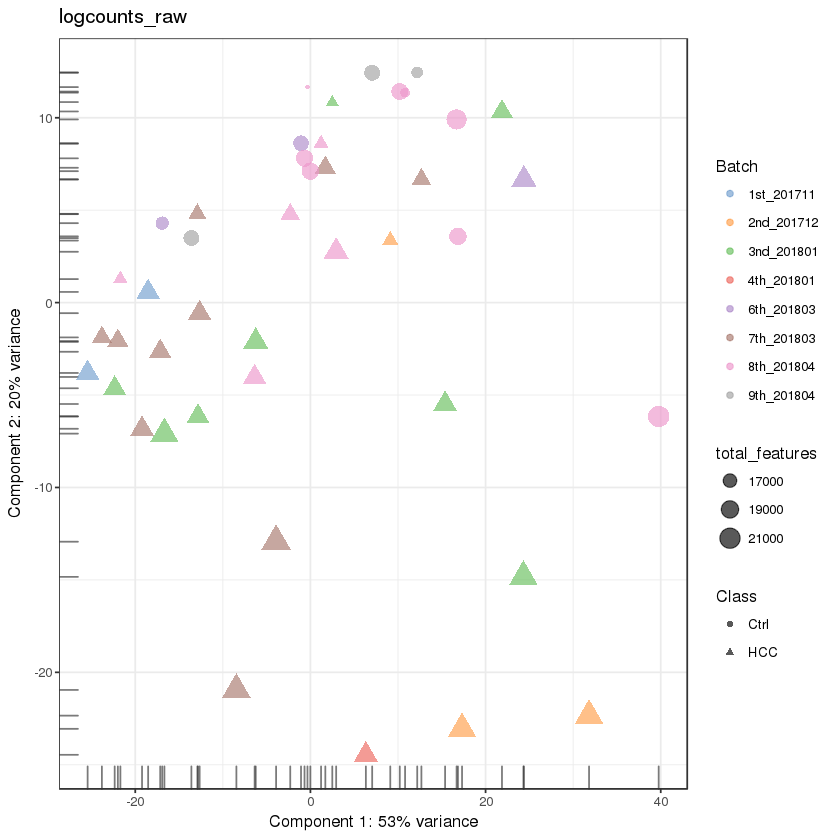

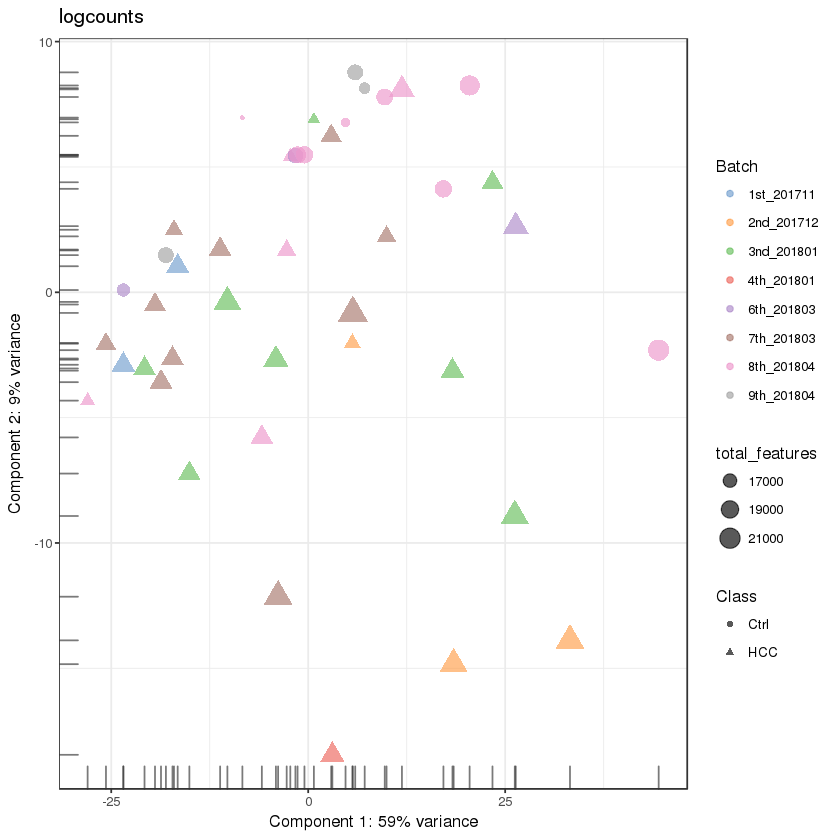

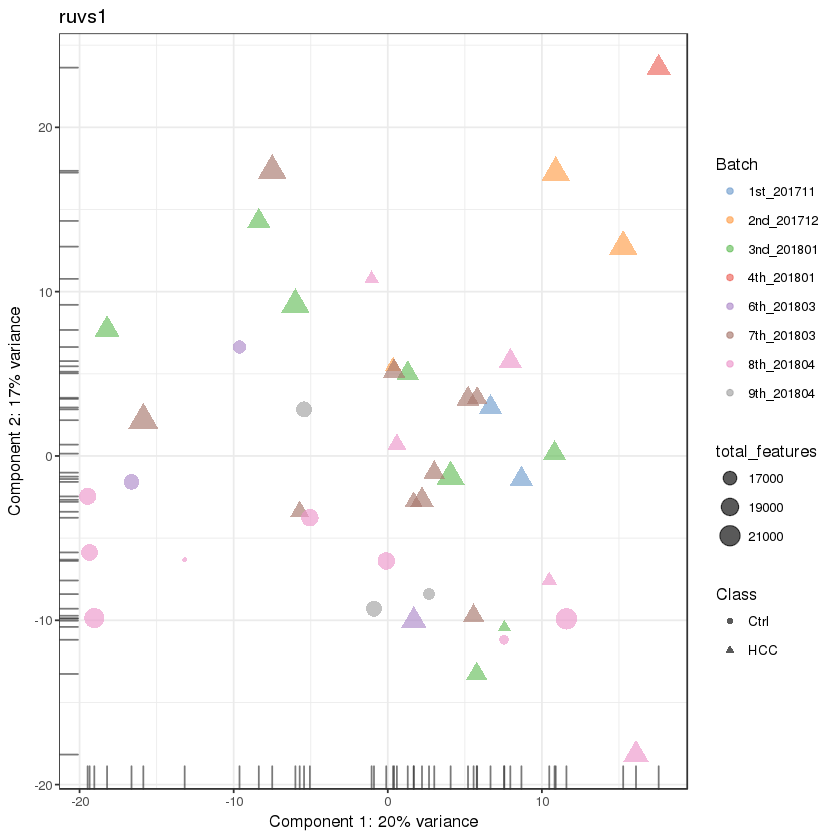

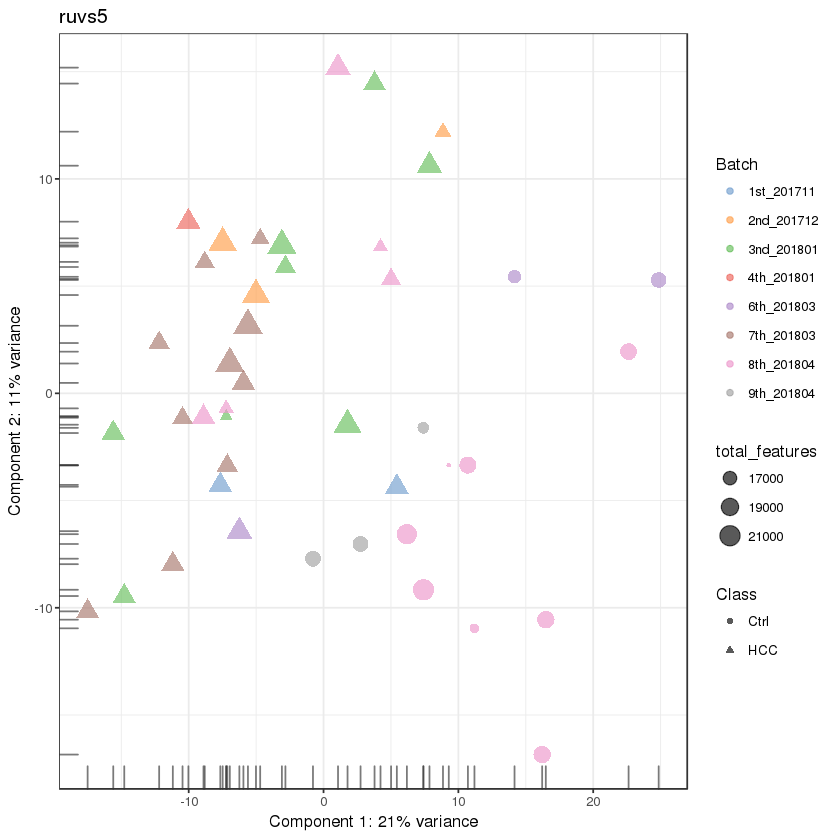

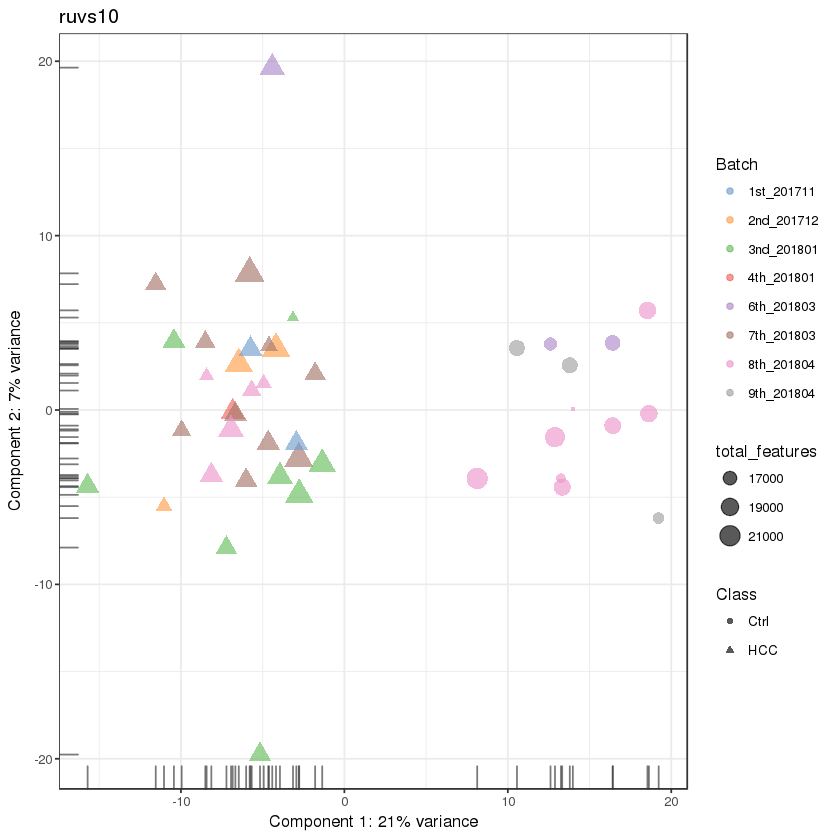

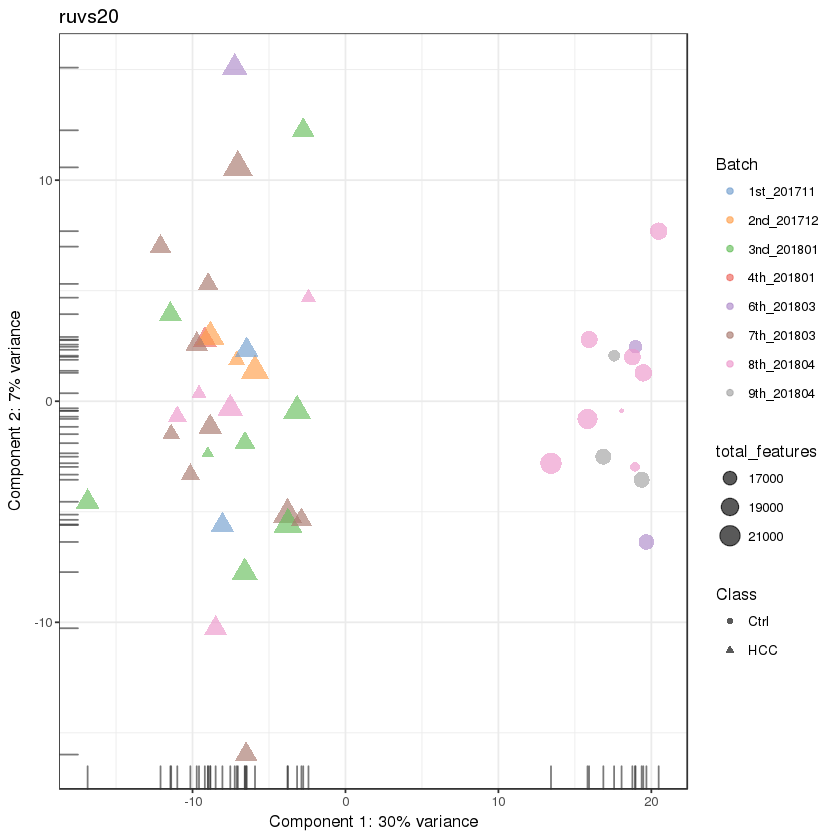

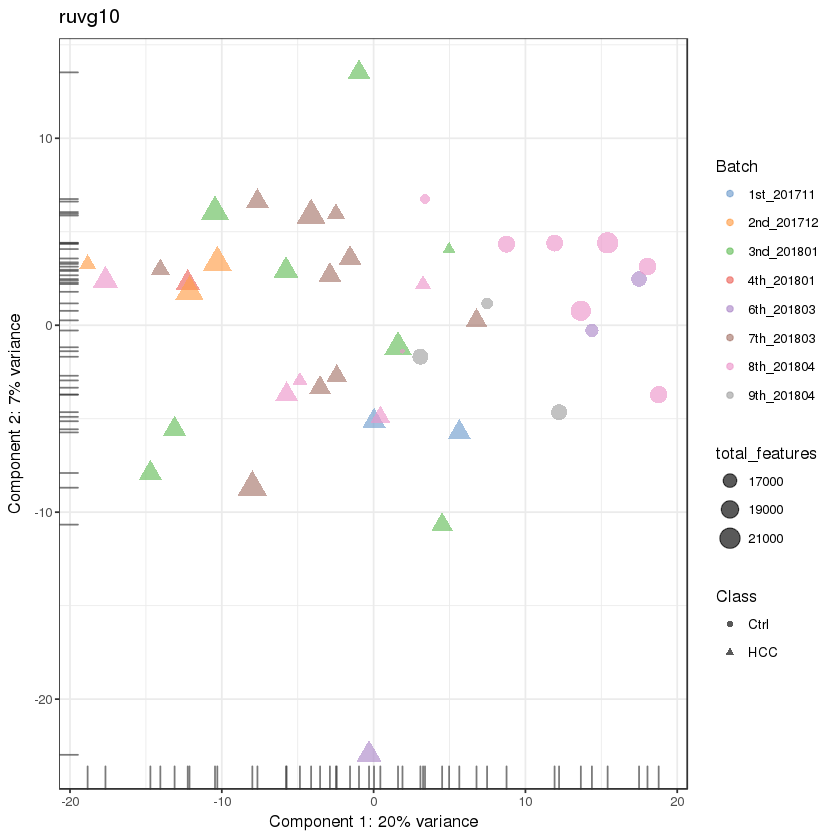

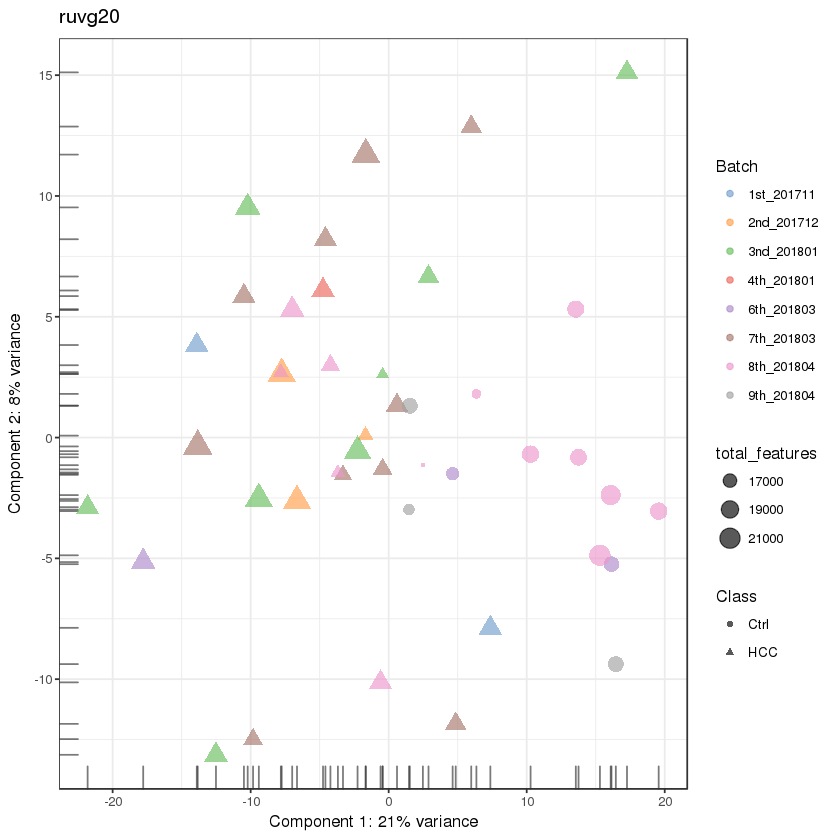

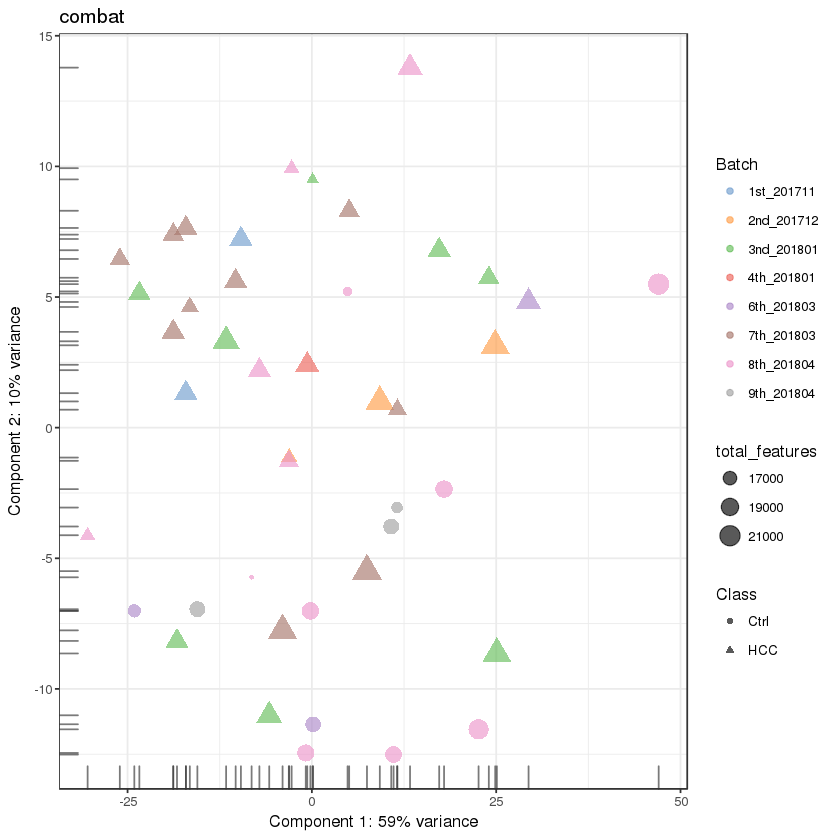

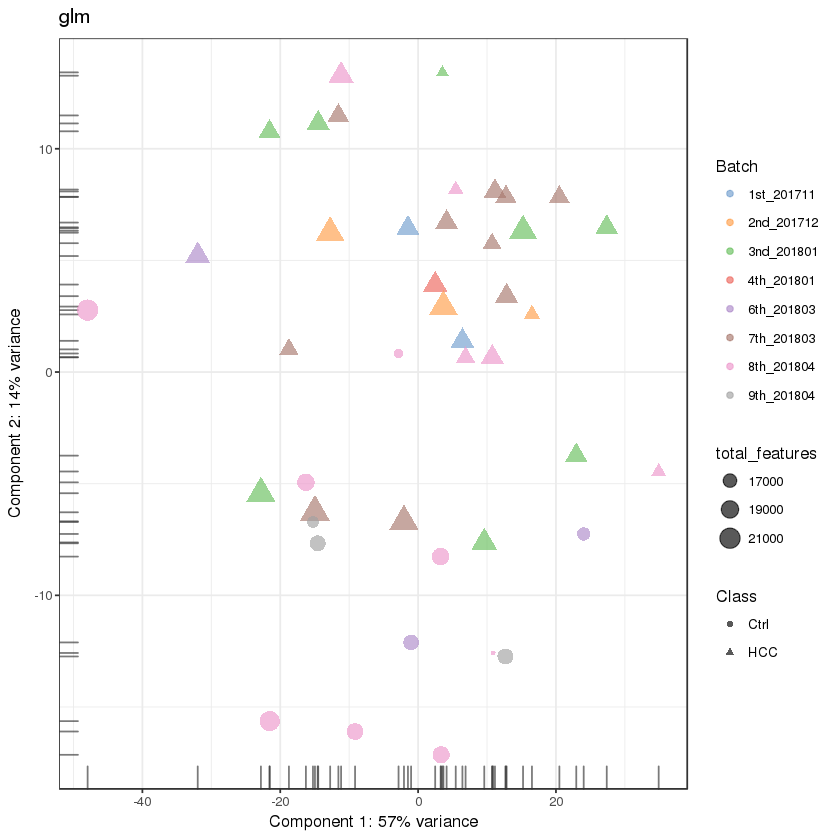

In [143]:
# Effectiveness 1
for(n in assayNames(reads.qc.impute)) {
    print(
        plotPCA(
            reads.qc.impute[endog_genes, ],
            colour_by = "Batch",
            size_by = "total_features",
            shape_by = "Class",
            exprs_values = n
        ) +
        ggtitle(n)
    )
}

We can also examine the effectiveness of correction using the relative log expression (RLE) across samples to confirm technical noise has been removed from the dataset. Note RLE only evaluates whether the number of genes higher and lower than average are equal for each samples - i.e. systemic technical effects. Random technical noise between batches may not be detected by RLE.

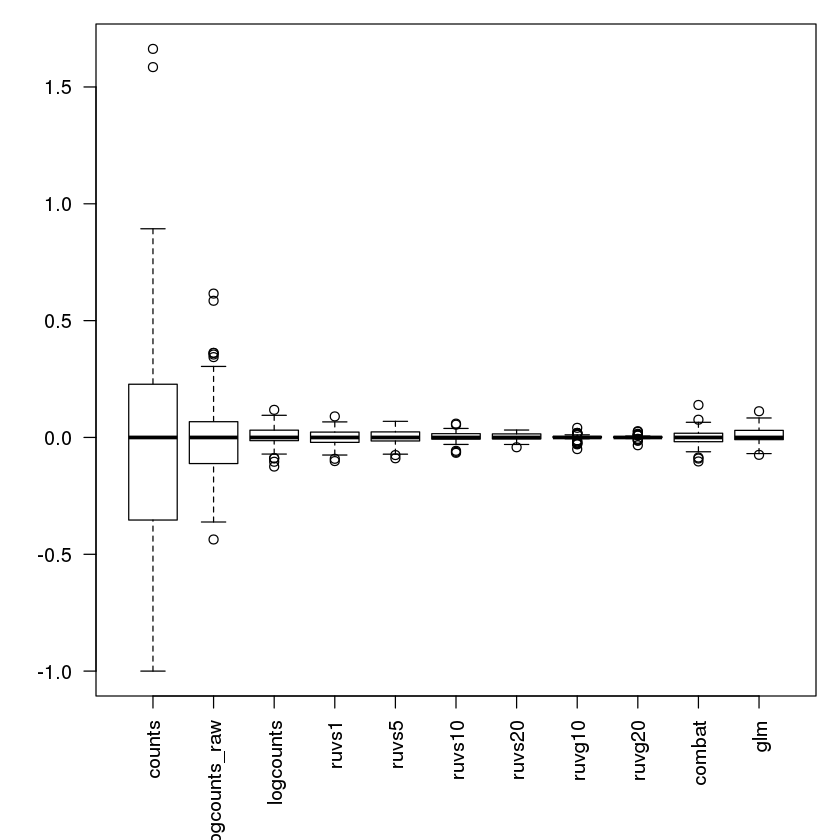

In [144]:

# Effectiveness 2
res <- list()
for(n in assayNames(reads.qc.impute)) {
    res[[n]] <- suppressWarnings(calc_cell_RLE(assay(reads.qc.impute, n)))
}
par(mar=c(6,4,1,1))
boxplot(res, las=2)

Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 10 rows containing non-finite values (stat_density).”

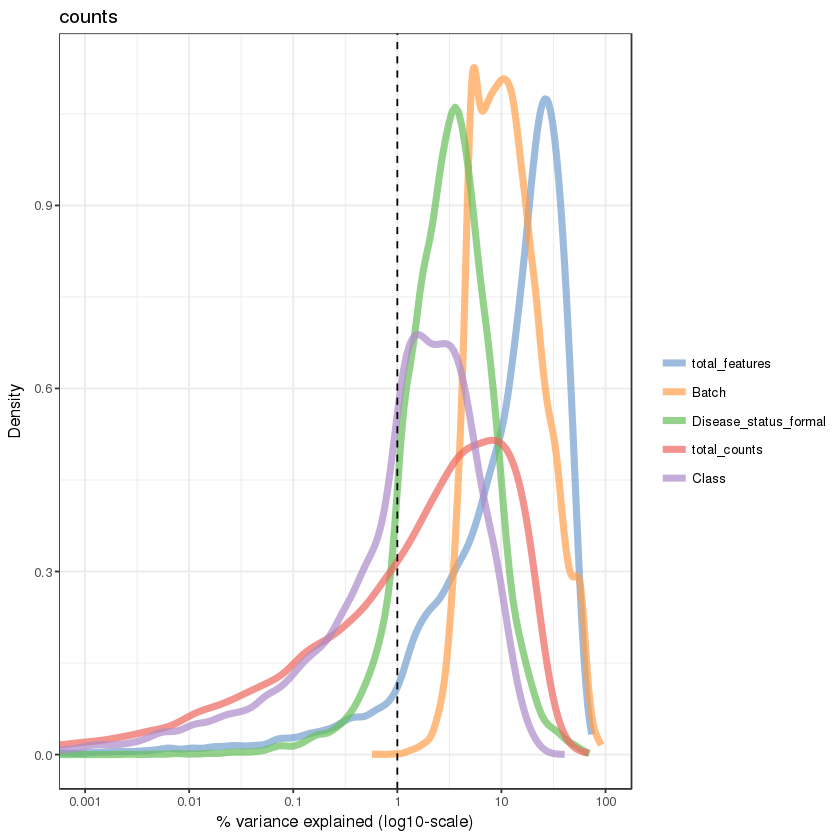

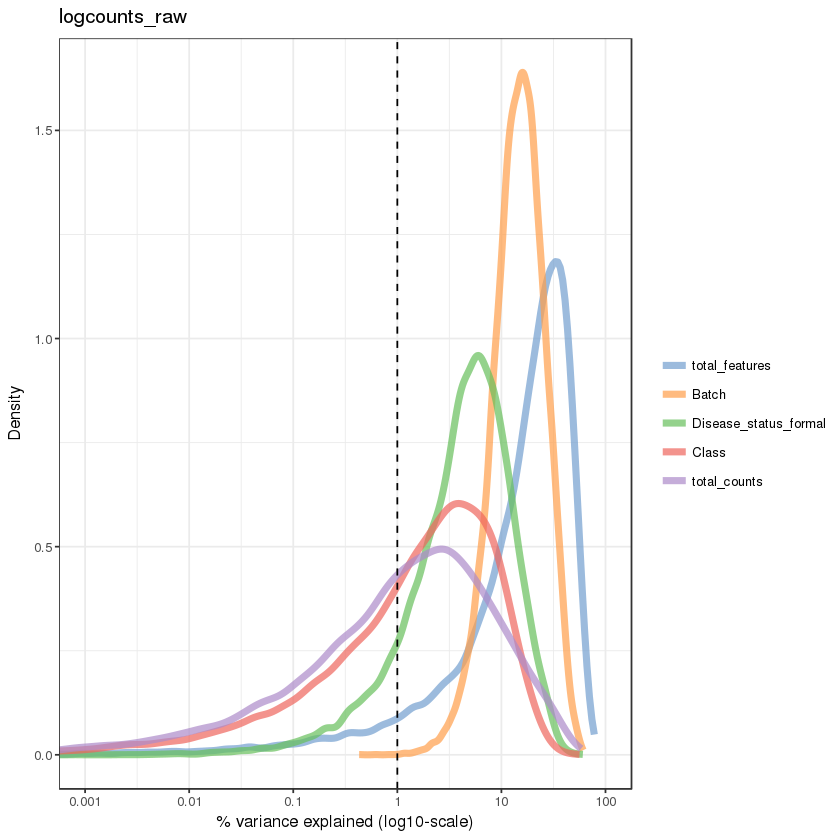

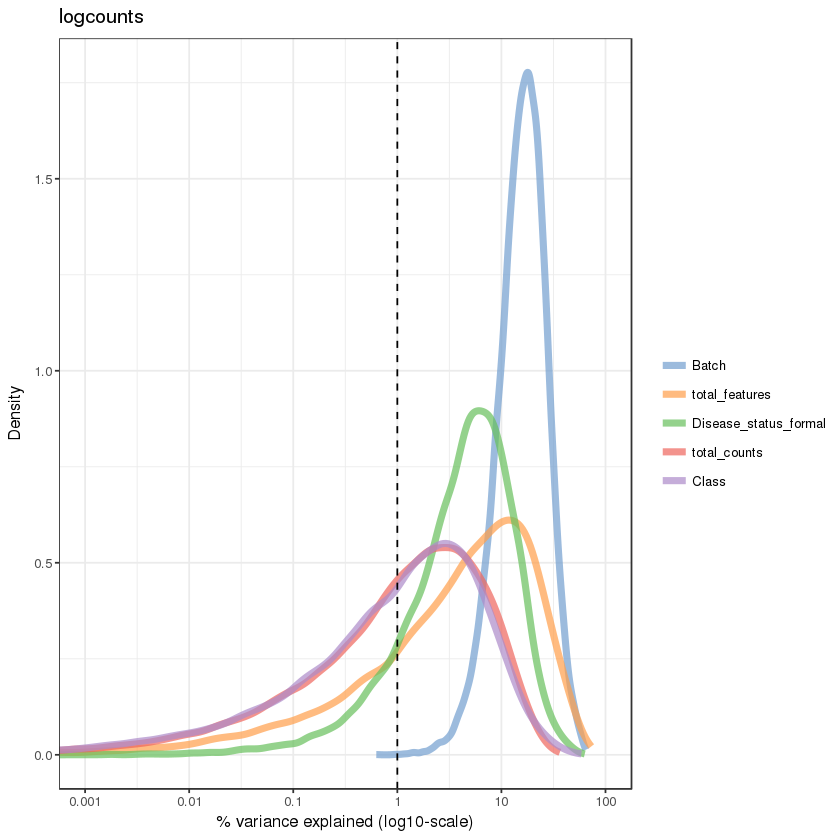

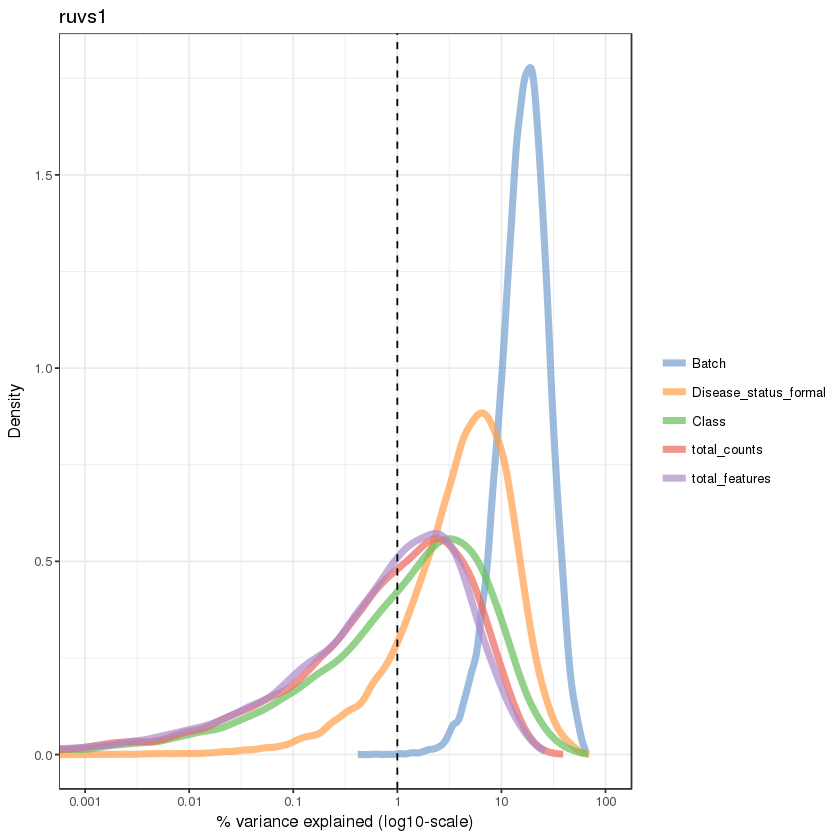

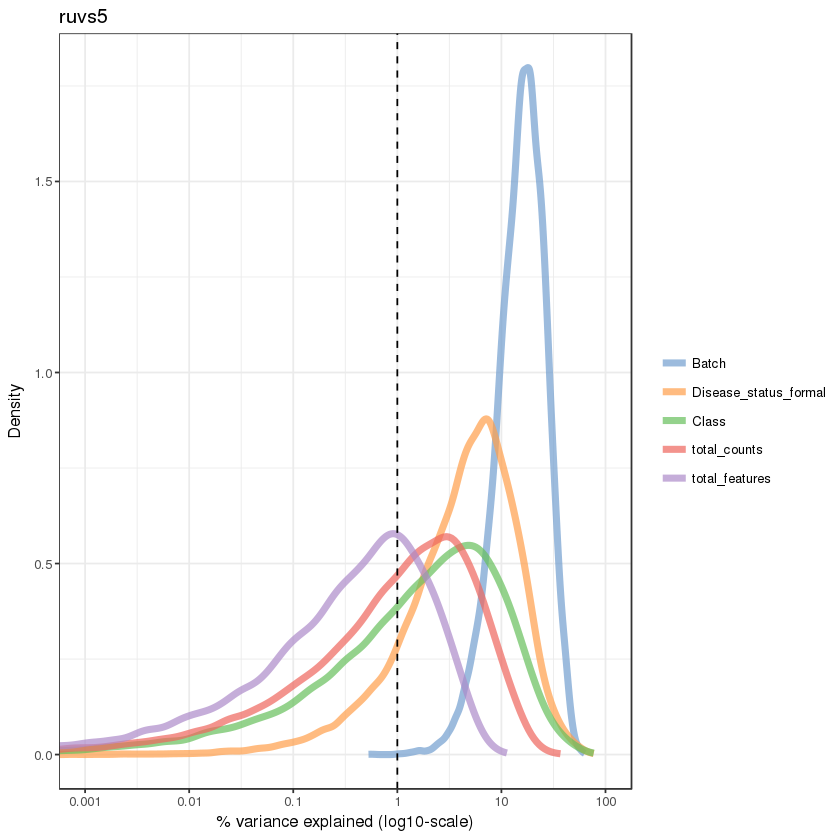

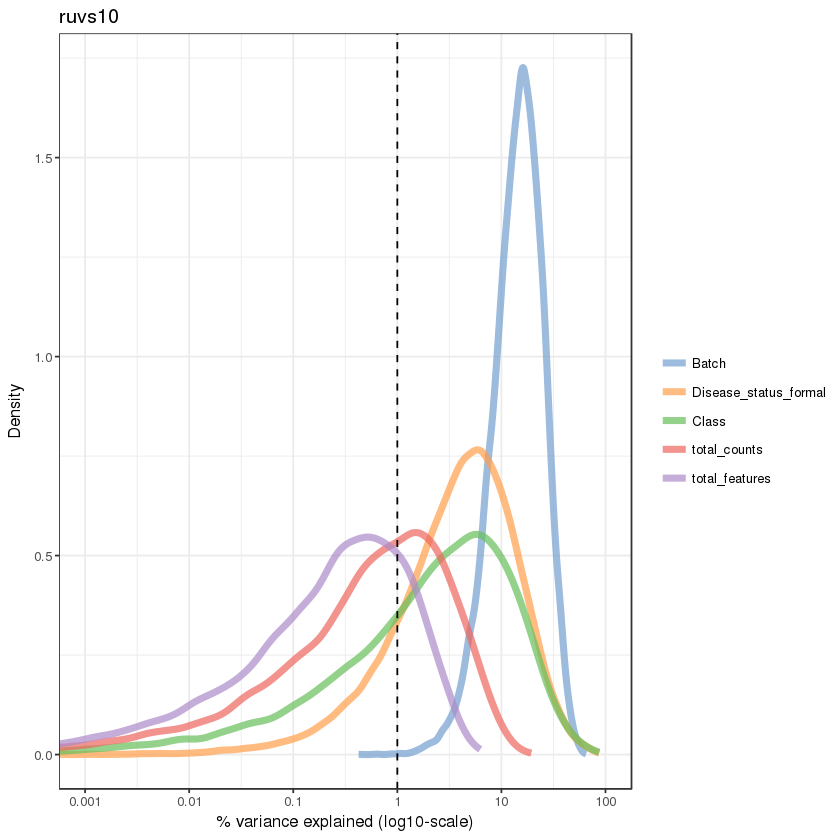

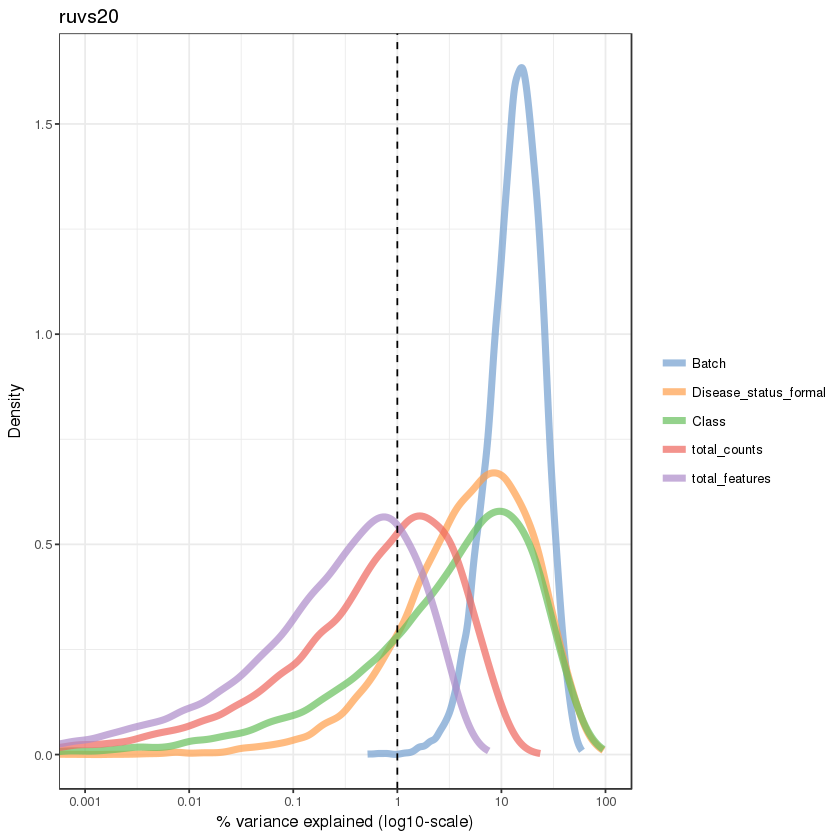

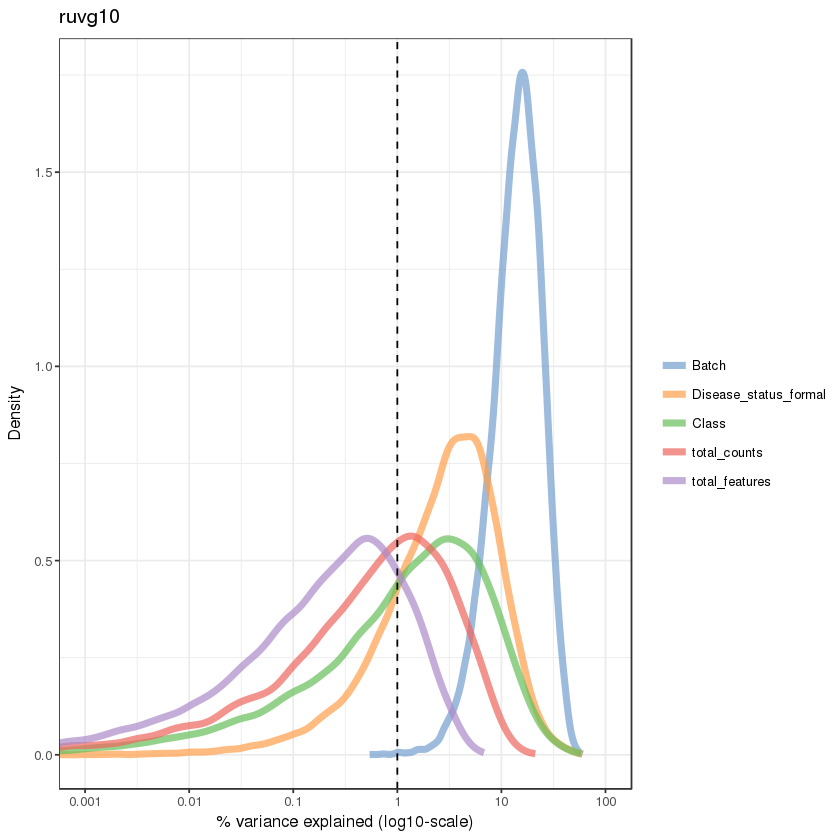

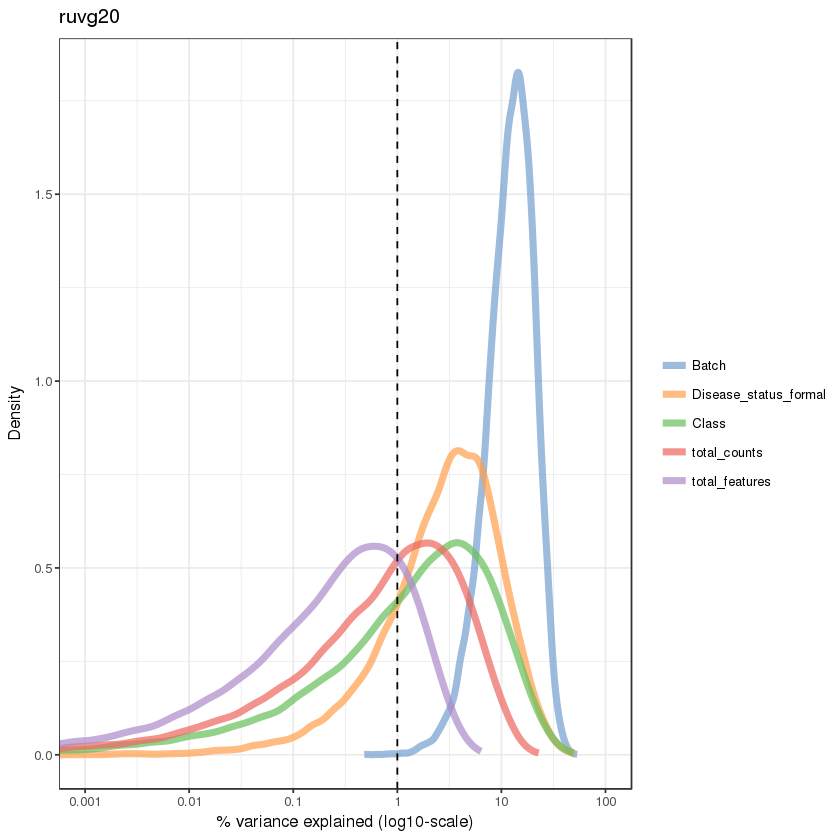

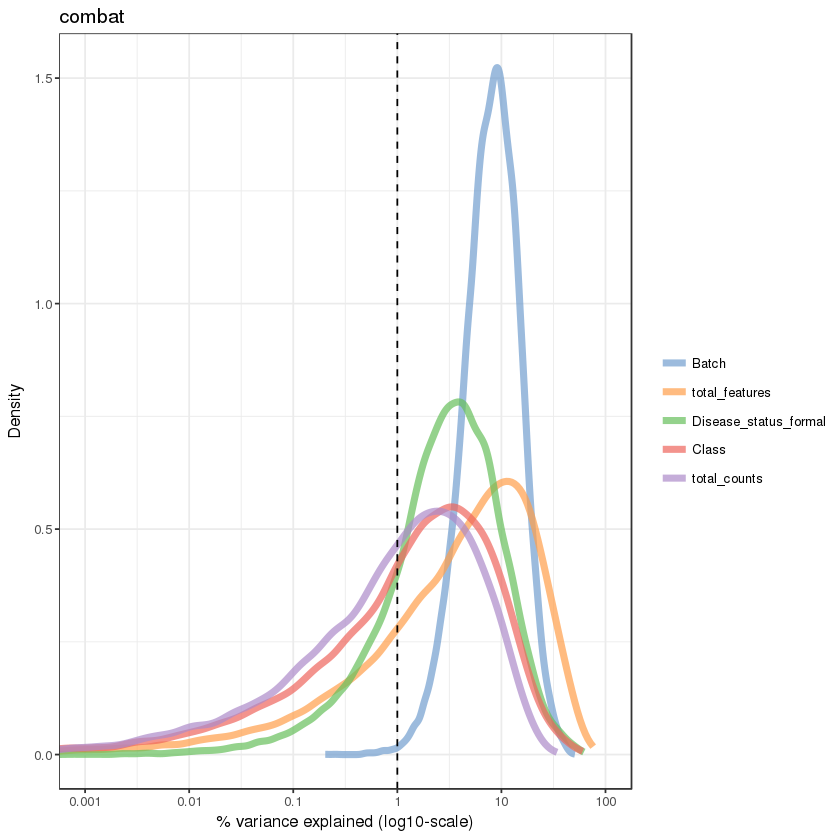

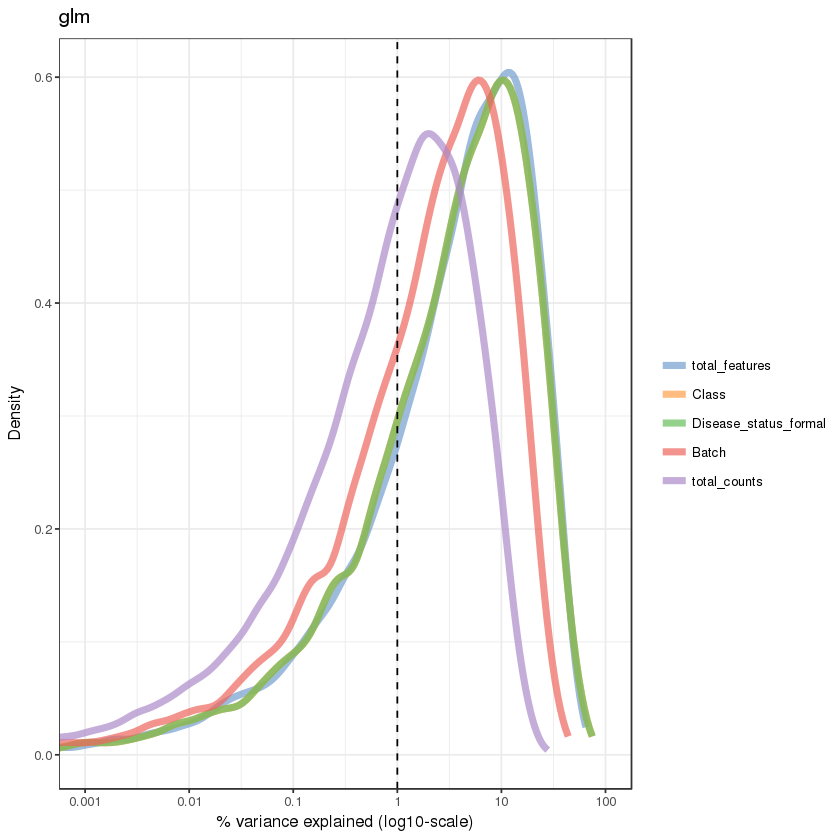

In [145]:
for(n in assayNames(reads.qc.impute)) {
    print(
        plotQC(
            reads.qc.impute[endog_genes, ],
            type = "expl",
            exprs_values = n,
            variables = c(
                "total_features",
                "total_counts",
                "Batch",
                "Class",
                "Disease_status_formal"
            )
        ) +
        ggtitle(n)
    )
}

### save data

In [87]:
saveRDS(reads.qc.impute, 
        file = "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim43sample.allclean.rds")

In [89]:
inputF1 <- t(assay(reads.qc.impute, i="ruvs20"))
write.csv(data.frame(sampleID = rownames(inputF1), lables = sampleLables, inputF1),'05.matrix/forfeatureselectionbyruvs20_43sample.csv')


In [ ]:
reads.qc.impute

************************
## Clustering

In [407]:
library(mclust)
library(SC3)
set.seed(1234567)

Package 'mclust' version 5.4
Type 'citation("mclust")' for citing this R package in publications.

Attaching package: ‘mclust’

The following object is masked from ‘package:mgcv’:

    mvn



In [408]:
reads.qc.impute <- readRDS("05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim.allclean.rds")
#? hcc_lulab.sequentialMap.homer.merged.clean.impute.rds   ???

Estimating k...


[1] 3

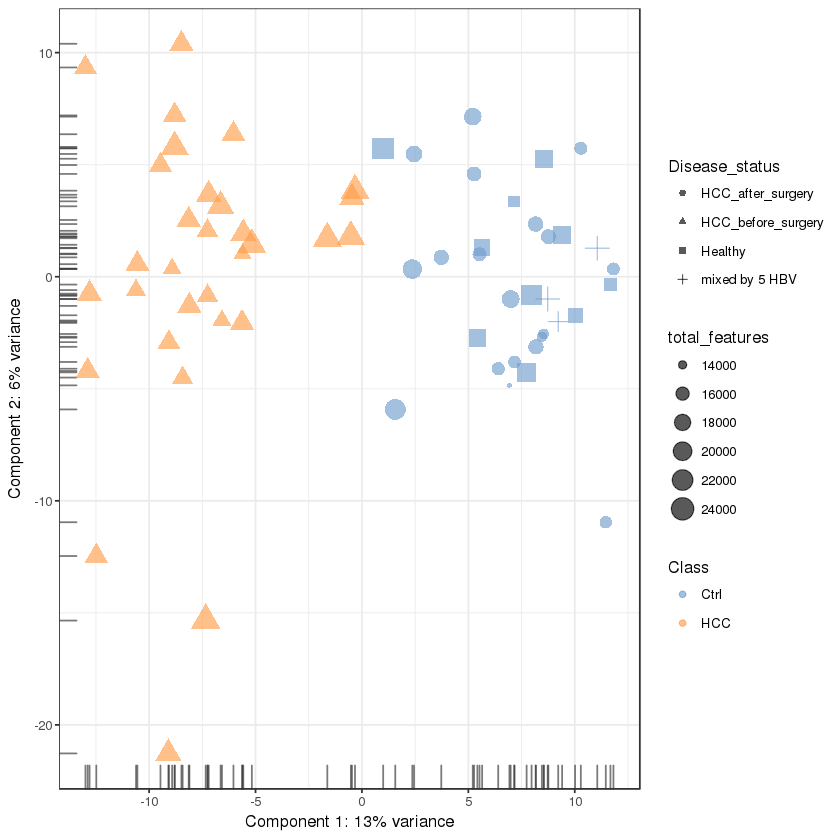

In [410]:
# using SC3
reads.qc.impute <- sc3_estimate_k(reads.qc.impute)
metadata(reads.qc.impute)$sc3$k_estimation
plotPCA(reads.qc.impute, exprs_values = "ruvs20", colour_by = "Class", size_by = "total_features", shape_by = "Disease_status")


In [413]:
inputF1 <- t(assay(reads.qc.impute, i="ruvs20"))

In [417]:
write.csv(data.frame(sampleID = rownames(inputF1), lables = sampleLables, inputF1),'05.matrix/forfeatureselectionbyruvs20.csv')

In [414]:
inputF1

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.matrix(obj)
9. repr_matrix_generic(obj, sprintf("\\begin{tabular}{%s}\n%%s%%s\\end{tabular}\n", 
 .     cols), "%s\\\\\n\\hline\n", "  &", " %s &", "%s", "\t%s\\\\\n", 
 .     "%s &", " %s &", escape_fun = latex_escape_vec, ...)
10. sprintf(wrap

miRNA_ENSG00000278267.1 miRNA_ENSG00000273874.1
lulab_249136_B    0.37504059             -0.602118423           
lulab_385247_B    1.14994055              0.368270567           
lulab_423976_B   -0.22227896             -0.221909755           
lulab_497411_B   -0.14745171              0.104863470           
lulab_497497_B    0.25398206              0.453854139           
lulab_498127_B   -0.75603699             -0.437864713           
lulab_498187_B    0.09638735             -1.007032799           
lulab_498221_B    0.33563190              0.025567827           
lulab_507450_B    0.18964930             -0.192191317           
lulab_507468_B    0.31493439              0.063121242           
lulab_507511_B    1.00419779              0.699791098           
lulab_507599_B    0.11028216             -0.634920266           
lulab_507867_B    0.90976319              0.162989359           
lulab_507887_B    0.32566419             -0.002118925           
lulab_507891_B    0.41991204             -0.102614385           
lulab_507909_B    0.78666454              0.617043372           
lulab_508877_B    0.32980857              0.314342912           
lulab_508897_B    0.12903351              0.235236815           
lulab_511030_B    0.45914670             -0.044773785           
lulab_511485_B    0.62734959             -0.064779275           
lulab_515058_B    0.31756251             -0.083782515           
lulab_515292_B    0.19831104             -1.028326006           
lulab_SH325716_B -0.93167438             -1.347806648           
lulab_SH327409_B  0.48435194             -0.249596596           
lulab_SH327412_B  0.49900985              0.519334890           
lulab_SH327428_B  0.46543993              0.645865831           
lulab_17402567_B  0.35146464             -0.078808949           
lulab_3497470_B   0.70045901              0.163779126           
lulab_5474594_B   0.50716903              0.119073706           
lulab_6474170_B   1.17880400              0.301450397           
⋮                ⋮                       ⋮                      
lulab_CXD         0.9847710               0.11863457            
lulab_Normal_1    0.8813218               0.22429920            
lulab_Normal_2    1.3578588               0.85663313            
lulab_Normal_3    1.0903262               0.14511352            
lulab_Normal_5    1.0349743               0.30114313            
lulab_Normal_6    1.5847978               0.50146622            
lulab_Normal_7    0.8473874               0.26629860            
lulab_Normal_8    0.6266532               0.50688589            
lulab_498187_A    0.4507004              -0.01324050            
lulab_498221_A    0.7072961               0.34946194            
lulab_385247_A    1.4101154               0.56309633            
lulab_498191_A    0.8613728               0.53811593            
lulab_511122_A    0.7934700              -0.13868685            
lulab_510199_A    1.0377446               0.46942007            
lulab_333874_A    0.8288915              -0.12306975            
lulab_482592_A    1.2192869               0.38524239            
lulab_486978_A    0.9700540               0.41236815            
lulab_508955_A   -0.2772289              -0.41799731            
lulab_509155_A    0.5964925               0.47237109            
lulab_509442_A    0.6129387               0.02556803            
lulab_509970_A    1.4039517               0.10061780            
lulab_510470_A    1.0447558               0.23493304            
lulab_515058_A    1.5223399              -0.49431297            
lulab_515292_A    0.9995082               0.20260269            
lulab_10515058_A  0.9069004               0.35262396            
lulab_12402567_A  0.2703849               0.16769823            
lulab_13515292_A  1.1315503               0.36137865            
lulab_HBV_1       1.2481796               0.90941385            
lulab_HBV_2       0.7610102              -0.04250617            
lulab_HBV_3       0.1069576              -1.73696378

In [ ]:
# run sc3
reads.qc.impute <- sc3(reads.qc.impute, ks = 2, biology = TRUE)
# consensus matrix
sc3_plot_consensus(reads.qc.impute, k = 2, show_pdata = "Class")
# Silhouette plot
sc3_plot_silhouette(reads.qc.impute, k = 2)
# heatmap
sc3_plot_expression(reads.qc.impute, k = 2, show_pdata = "Class")
# identify marker genes
sc3_plot_markers(reads.qc.impute, k = 2, show_pdata = "Class")

****************
## feature selection

In [ ]:
library(scRNA.seq.funcs)
library(matrixStats)
library(scran)
library(M3Drop)
library(RColorBrewer)
library(SingleCellExperiment)
set.seed(1)
library(RColorBrewer)

In [ ]:
reads.qc.impute <- readRDS("hcc_lulab.sequentialMap.homer.merged.clean.impute.binned.rds")
anno <- read.table("hcc_lulab.sample.info.txt", sep = "\t", header=T)
anno$Class <- "Ctrl"
anno[which(anno$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"

sampleLables <- c()
for(i in colnames(reads.qc.impute)){tmp <- as.character(anno[which(anno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

In [ ]:
# highly variable genes without spike-ins
Brennecke_HVG <- BrenneckeGetVariableGenes(
    counts(reads.qc.impute),
    fdr = 0.05,
    minBiolDisp = 0.5
)

In [ ]:
Brennecke_HVG

In [ ]:
HVG_genes <- Brennecke_HVG   #? $Gene